<a href="https://colab.research.google.com/github/FabianaMansilla/DataScience-Ingenias/blob/main/Pre-Entrega2-EQUIPO5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Entrega2: An√°lisis de la Producci√≥n de Gas en Argentina (2006-2024)

Este proyecto tiene como objetivo realizar un an√°lisis exploratorio, transformar datos relevantes y por √∫ltimo desarrollar un modelo predictivo de la producci√≥n de gas natural en Argentina, aprovechando dos fuentes de datos:

* Conjunto de datos1: Serie hist√≥rica de producci√≥n de Gas Natural por cuenca y subtipo de recurso (Cap√≠tuloIV). Disponible en la secci√≥n ‚ÄúSerie hist√≥rica de producci√≥n de Gas Natural por cuenca y subtipo de recurso (Cap√≠tulo IV)‚Äù del portal de datos de energ√≠a de Argentina.
Enlace: http://datos.energia.gob.ar/dataset/serie-historica-de-produccion-de-gas-natural-por-cuenca-y-sub-tipo-de-recurso-captulo-iv

* Conjunto de datos2: Producci√≥n de Pozos de Gas y Petr√≥leo No Convencional. Disponible en la secci√≥n ‚ÄúProducci√≥n de petr√≥leo y gas por pozo‚Äù (no convencional) del portal de datos energ√≠a de Argentina.
Enlace: http://datos.energia.gob.ar/dataset/produccion-de-petroleo-y-gas-por-pozo

In [246]:
#Importamos librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **Carga e inspecci√≥n Dataset1**

In [247]:
#COMENZAMOS CON EL DATASET1
#Carga del archivo Dataset1
dataset1 = pd.read_csv('serie-histrica-de-produccin-de-gas-natural-por-cuenca-y-sub-tipo-de-recurso-captulo-iv-.csv')

In [248]:
#Inspecci√≥n B√°sica
dataset1.head()

indice_tiempo  produccion_gas_natural_cuenca_austral  \
0       2006-01                            856179.0548   
1       2006-02                            779265.9292   
2       2006-03                            807060.6516   
3       2006-04                            855962.9924   
4       2006-05                            905943.5735   

   produccion_gas_natural_cuenca_gsj  produccion_gas_natural_cuenca_neuquina  \
0                        357316.6790                            2.401347e+06   
1                        309565.3828                            2.288115e+06   
2                        384218.4085                            2.507932e+06   
3                        376149.2286                            2.395269e+06   
4                        409186.6946                            2.571095e+06   

   produccion_gas_natural_cuenca_noroeste  \
0                             609196.2466   
1                             532122.4430   
2                             588406.1140   
3                             570671.5738   
4                             562752.1099   

   produccion_gas_natural_cuenca_cuyana  produccion_gas_natural_total  \
0                             5201.6404                  4.229240e+06   
1                             4273.6100                  3.913342e+06   
2                             5135.2570                  4.292752e+06   
3                             4986.4970                  4.203039e+06   
4                             5265.7730                  4.454243e+06   

   produccion_gas_natural_total_diario  produccion_shale_gas  \
0                             136.4271                16.384   
1                             139.7622                13.954   
2                             138.4759                18.104   
3                             140.1013                19.627   
4                             143.6853                19.016   

   produccion_tight_gas  participacion_no_convencional  
0           32491.62664                         0.7686  
1           30778.94772                         0.7869  
2           33024.46882                         0.7697  
3           31342.49019                         0.7462  
4           39199.71537                         0.8805

In [249]:
#Inspecci√≥n B√°sica: Tama√±o de dataset1
dataset1.shape

(231, 11)

In [250]:
#Inspecci√≥n B√°sica: Nombres columnas dataset1
dataset1.columns

Index(['indice_tiempo', 'produccion_gas_natural_cuenca_austral',
       'produccion_gas_natural_cuenca_gsj',
       'produccion_gas_natural_cuenca_neuquina',
       'produccion_gas_natural_cuenca_noroeste',
       'produccion_gas_natural_cuenca_cuyana', 'produccion_gas_natural_total',
       'produccion_gas_natural_total_diario', 'produccion_shale_gas',
       'produccion_tight_gas', 'participacion_no_convencional'],
      dtype='object')

In [251]:
#Inspecci√≥n B√°sica: An√°lisis de datos faltantes dataset 1
dataset1.isnull().sum()

indice_tiempo                             0
produccion_gas_natural_cuenca_austral     0
produccion_gas_natural_cuenca_gsj         0
produccion_gas_natural_cuenca_neuquina    0
produccion_gas_natural_cuenca_noroeste    0
produccion_gas_natural_cuenca_cuyana      0
produccion_gas_natural_total              0
produccion_gas_natural_total_diario       0
produccion_shale_gas                      0
produccion_tight_gas                      0
participacion_no_convencional             0
dtype: int64

**An√°lisis de Datos Faltantes en el dataset1**

Para verificar la presencia de valores nulos en el dataset1, se utiliz√≥ el m√©todo .isna().sum(). El resultado muestra que ninguna columna presenta datos faltantes, lo que implica que no es necesario realizar imputaci√≥n ni eliminaci√≥n de registros en esta etapa del an√°lisis.

**Visualizaci√≥n Inicial del dataset1**

 Primero convertimos la columna de fecha a datetime para que pandas reconozca la variable como temporal, esto nos permitir√°:
*   Poder ordenar correctamente los registros
*   An√°lisi de series temporales
*   Que matplotlib sit√∫e los ticks del eje x en fechas de manera autom√°tica.

In [252]:
# Asegurarse de que la columna de fechas est√© en formato datetime
dataset1['indice_tiempo'] = pd.to_datetime(dataset1['indice_tiempo'])

In [253]:
# Verificamos el cambio
dataset1.dtypes

indice_tiempo                             datetime64[ns]
produccion_gas_natural_cuenca_austral            float64
produccion_gas_natural_cuenca_gsj                float64
produccion_gas_natural_cuenca_neuquina           float64
produccion_gas_natural_cuenca_noroeste           float64
produccion_gas_natural_cuenca_cuyana             float64
produccion_gas_natural_total                     float64
produccion_gas_natural_total_diario              float64
produccion_shale_gas                             float64
produccion_tight_gas                             float64
participacion_no_convencional                    float64
dtype: object

In [254]:
# Ordenar por fecha
dataset1 = dataset1.sort_values('indice_tiempo')

In [255]:
# Filtrar por rango de a√±os (2006 a 2024)
dataset1_filtrado = dataset1[(dataset1['indice_tiempo'].dt.year >= 2006) &
                            (dataset1['indice_tiempo'].dt.year <= 2024)]


**Limitar el An√°lisis hasta 2024**

Para evitar distorsiones en nuestro an√°lisis y obtener una representaci√≥n m√°s precisa de las tendencias hist√≥ricas de producci√≥n de gas, se tom√≥ la decisi√≥n de limitar el an√°lisis a los datos hasta el a√±o 2024.  Al excluir 2025, nos aseguramos de que todas las comparaciones se realicen entre a√±os completos, lo que permite identificar patrones de crecimiento, fluctuaciones c√≠clicas y tendencias a largo plazo de manera confiable.

Sin embargo, reconocemos el valor de los datos de 2025 como informaci√≥n reciente que puede ser √∫til para evaluar la capacidad predictiva de nuestros modelos.  Por lo tanto, planeamos utilizar los datos de 2025 como un conjunto de validaci√≥n para los modelos de pron√≥stico, lo que nos permitir√° evaluar qu√© tan bien generalizan a datos nuevos y parcialmente disponibles.

**Comparaci√≥n de la serie completa vs. √∫ltimos 10 a√±os**

A continuaci√≥n, realizamos una comparaci√≥n entre la serie hist√≥rica completa y los √∫ltimos 10 a√±os de datos de producci√≥n de gas natural (Dataset 1). El objetivo es analizar si la informaci√≥n m√°s reciente mantiene un comportamiento similar al hist√≥rico o si presenta tendencias distintas que justifiquen entrenar un modelo predictivo utilizando √∫nicamente ese per√≠odo m√°s reciente. Esta comparaci√≥n nos permitir√° tomar decisiones fundamentadas sobre el recorte temporal m√°s adecuado para el an√°lisis y modelado posterior.

In [256]:
#Filtrar √∫ltimos 10 a√±os
dataset1_10 = dataset1_filtrado[dataset1_filtrado['indice_tiempo'] >= '2014-01-01']

In [257]:
from scipy.stats import linregress

# 1) Estad√≠sticas descriptivas
estadisticos = {
    'Estad√≠stico': ['Per√≠odo', 'Promedio', 'Desviaci√≥n est√°ndar', 'M√≠nimo', 'M√°ximo'],
    'Serie completa': [
        f"{dataset1_filtrado['indice_tiempo'].iloc[0].strftime('%Y-%m')} a {dataset1_filtrado['indice_tiempo'].iloc[-1].strftime('%Y-%m')}",
        round(dataset1_filtrado['produccion_gas_natural_total'].mean(), 0),
        round(dataset1_filtrado['produccion_gas_natural_total'].std(), 0),
        round(dataset1_filtrado['produccion_gas_natural_total'].min(), 0),
        round(dataset1_filtrado['produccion_gas_natural_total'].max(), 0)
    ],
    '√öltimos 10 a√±os': [
        f"{dataset1_10['indice_tiempo'].iloc[0].strftime('%Y-%m')} a {dataset1_10['indice_tiempo'].iloc[-1].strftime('%Y-%m')}",
        round(dataset1_10['produccion_gas_natural_total'].mean(), 0),
        round(dataset1_10['produccion_gas_natural_total'].std(), 0),
        round(dataset1_10['produccion_gas_natural_total'].min(), 0),
        round(dataset1_10['produccion_gas_natural_total'].max(), 0)
    ]
}
# Creamos y mostramos la tabla
tabla_estadisticos = pd.DataFrame(estadisticos)
print(tabla_estadisticos.to_string(index=False))

# 2) Tendencia lineal (Regresi√≥n)
def calcular_tendencia(df, nombre):
    x = range(len(df))
    y = df['produccion_gas_natural_total'].values
    pendiente, intercepto, r_value, _, _ = linregress(x, y)
    print(f"\nTendencia ({nombre}): pendiente={pendiente:.2f}, R¬≤={r_value**2:.3f}")

calcular_tendencia(dataset1_filtrado, "serie completa")
calcular_tendencia(dataset1_10, "√∫ltimos 10 a√±os")

# 3) Correlaci√≥n entre ambas series (en el per√≠odo en com√∫n)
seriecomun = dataset1_filtrado[dataset1_filtrado['indice_tiempo'].isin(dataset1_10['indice_tiempo'])]
correlacion = seriecomun['produccion_gas_natural_total'].corr(dataset1_10['produccion_gas_natural_total'])

print(f"\nCorrelaci√≥n entre serie completa y √∫ltimos 10 a√±os (en el mismo per√≠odo): {correlacion:.3f}")

        Estad√≠stico    Serie completa   √öltimos 10 a√±os
            Per√≠odo 2006-01 a 2024-12 2014-01 a 2024-12
           Promedio         3897163.0         3848804.0
Desviaci√≥n est√°ndar          318748.0          308226.0
             M√≠nimo         3191665.0         3191665.0
             M√°ximo         4744011.0         4744011.0

Tendencia (serie completa): pendiente=-523.54, R¬≤=0.012

Tendencia (√∫ltimos 10 a√±os): pendiente=4909.11, R¬≤=0.371

Correlaci√≥n entre serie completa y √∫ltimos 10 a√±os (en el mismo per√≠odo): 1.000


Al revisar los datos de producci√≥n total de gas natural entre 2006 y 2024, y centrarnos en los √∫ltimos 10 a√±os (2014‚Äì2024), observamos que el promedio mensual y la variabilidad general apenas cambian. Esto nos indica que la serie reciente refleja fielmente el comportamiento hist√≥rico. Adem√°s, los valores m√°ximos y m√≠nimos de producci√≥n tambi√©n ocurren dentro de esa √∫ltima d√©cada, por lo que decidimos entrenar nuestro modelo predictivo usando esos 10 a√±os: as√≠ nos enfocamos en la din√°mica m√°s actual, sin perder de vista los extremos relevantes.

Cabe destacar que cada cuenca tiene un perfil distinto ‚Äîpor ejemplo, la Neuquina ha crecido impulsada por shale, el Noroeste muestra una tendencia a la baja, y la GSJ experimenta ca√≠das puntuales‚Äî. Un modelo √∫nico para todo el pa√≠s podr√≠a enmascarar estas diferencias. Evaluar cada cuenca por separado nos permitir√°:

* Ajustar la tendencia regional, capturando din√°micas propias de cada √°rea.
* Detectar eventos locales (nuevas perforaciones, paradas t√©cnicas) que afectan puntualmente la producci√≥n.
* Construir modelos predictivos m√°s precisos, al incorporar las particularidades de cada regi√≥n.


En resumen, utilizaremos los √∫ltimos 10 a√±os como base de nuestro an√°lisis y, simult√°neamente, realizaremos un estudio detallado por cuenca para garantizar que el modelo refleje las caracter√≠sticas espec√≠ficas de cada zona.

**An√°lisis Estadisticos Por Cuenca**

In [258]:
# Definir las columnas por cuenca
cuencas = [
    'produccion_gas_natural_cuenca_neuquina',
    'produccion_gas_natural_cuenca_austral',
    'produccion_gas_natural_cuenca_gsj',
    'produccion_gas_natural_cuenca_noroeste',
    'produccion_gas_natural_cuenca_cuyana'
]

# Filtrar √∫ltimos 10 a√±os
dataset_10 = dataset1_filtrado[(dataset1_filtrado['indice_tiempo'] >= '2014-01-01') &
                              (dataset1_filtrado['indice_tiempo'] <= '2024-12-31')]

for cuenca in cuencas:
    # Series completas y √∫ltimos 10 a√±os
    s_full = dataset1_filtrado[cuenca]
    s10 = dataset_10[cuenca]
    t_full0 = dataset1_filtrado['indice_tiempo'].iloc[0].strftime('%Y-%m')
    t_full1 = dataset1_filtrado['indice_tiempo'].iloc[-1].strftime('%Y-%m')
    t100 = dataset1_10['indice_tiempo'].iloc[0].strftime('%Y-%m')
    t101 = dataset1_10['indice_tiempo'].iloc[-1].strftime('%Y-%m')

    # Porcentajes no convencionales y convencionales
    shale_full = dataset1_filtrado['produccion_shale_gas']
    tight_full = dataset1_filtrado['produccion_tight_gas']
    no_conv_full = (shale_full + tight_full).clip(upper=s_full)
    porc_no_conv_full = (no_conv_full / s_full * 100).clip(upper=100)
    porc_conv_full = 100 - porc_no_conv_full

    shale_10 = dataset1_10['produccion_shale_gas']
    tight_10 = dataset1_10['produccion_tight_gas']
    s10_safe = s10.replace(0, pd.NA)
    no_conv_10 = (shale_10 + tight_10).clip(upper=s10)
    porc_no_conv_10 = (no_conv_10 / s10_safe * 100).clip(upper=100)
    porc_conv_10 = 100 - porc_no_conv_10

    # Estad√≠sticas descriptivas
    stats = {
        'Estad√≠stico': ['Per√≠odo', 'Promedio', 'Desviaci√≥n est√°ndar', 'M√≠nimo', 'M√°ximo',
                        'Convencional (%)', 'No convencional (%)'],
        'Serie completa': [
            f'{t_full0} a {t_full1}',
            round(s_full.mean(), 0),
            round(s_full.std(), 0),
            round(s_full.min(), 0),
            round(s_full.max(), 0),
            round(porc_conv_full.mean(), 2),
            round(porc_no_conv_full.mean(), 2)
        ],
        '√öltimos 10 a√±os': [
            f'{t100} a {t101}',
            round(s10.mean(), 0),
            round(s10.std(), 0),
            round(s10.min(), 0),
            round(s10.max(), 0),
            round(porc_conv_10.mean(), 2),
            round(porc_no_conv_10.mean(), 2)
        ]
    }

    df_stats = pd.DataFrame(stats)
    print(f'\n=== Estad√≠sticos: {cuenca} ===')
    display(df_stats)

    # Tendencias
    print('--- Tendencias ---')
    def tendencia(s, nombre):
        x = list(range(len(s)))
        y = s.values
        pendiente, _, r_value, _, _ = linregress(x, y)
        print(f'  Tendencia ({nombre}): pendiente={pendiente:.2f}, R¬≤={r_value**2:.3f}')
    tendencia(s_full, 'serie completa')
    tendencia(s10, '√∫ltimos 10 a√±os')

    # Correlaci√≥n
    comun = s_full[s_full.index.isin(s10.index)]
    corr = comun.corr(s10)
    print(f'Correlaci√≥n entre ambos per√≠odos: {corr:.3f}')
    print('‚Äî' * 40)


=== Estad√≠sticos: produccion_gas_natural_cuenca_neuquina ===


Estad√≠stico     Serie completa    √öltimos 10 a√±os
0              Per√≠odo  2006-01 a 2024-12  2014-01 a 2024-12
1             Promedio          2335868.0          2414245.0
2  Desviaci√≥n est√°ndar           336350.0           373497.0
3               M√≠nimo          1730463.0          1756761.0
4               M√°ximo          3560944.0          3560944.0
5     Convencional (%)              62.93              39.99
6  No convencional (%)              37.07              60.01

--- Tendencias ---
  Tendencia (serie completa): pendiente=2196.64, R¬≤=0.186
  Tendencia (√∫ltimos 10 a√±os): pendiente=8120.99, R¬≤=0.692
Correlaci√≥n entre ambos per√≠odos: 1.000
‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî

=== Estad√≠sticos: produccion_gas_natural_cuenca_austral ===


Estad√≠stico     Serie completa    √öltimos 10 a√±os
0              Per√≠odo  2006-01 a 2024-12  2014-01 a 2024-12
1             Promedio           861745.0           870852.0
2  Desviaci√≥n est√°ndar            88081.0            95127.0
3               M√≠nimo           652089.0           652089.0
4               M√°ximo          1087217.0          1087217.0
5     Convencional (%)              40.66               7.12
6  No convencional (%)              59.34              92.88

--- Tendencias ---
  Tendencia (serie completa): pendiente=135.91, R¬≤=0.010
  Tendencia (√∫ltimos 10 a√±os): pendiente=-552.27, R¬≤=0.049
Correlaci√≥n entre ambos per√≠odos: 1.000
‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî

=== Estad√≠sticos: produccion_gas_natural_cuenca_gsj ===


Estad√≠stico     Serie completa    √öltimos 10 a√±os
0              Per√≠odo  2006-01 a 2024-12  2014-01 a 2024-12
1             Promedio           405022.0           393128.0
2  Desviaci√≥n est√°ndar            51463.0            58804.0
3               M√≠nimo           300492.0           300492.0
4               M√°ximo           504607.0           504607.0
5     Convencional (%)              31.24                0.9
6  No convencional (%)              68.76               99.1

--- Tendencias ---
  Tendencia (serie completa): pendiente=-418.26, R¬≤=0.287
  Tendencia (√∫ltimos 10 a√±os): pendiente=-1372.11, R¬≤=0.797
Correlaci√≥n entre ambos per√≠odos: 1.000
‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî

=== Estad√≠sticos: produccion_gas_natural_cuenca_noroeste ===


Estad√≠stico     Serie completa    √öltimos 10 a√±os
0              Per√≠odo  2006-01 a 2024-12  2014-01 a 2024-12
1             Promedio           290001.0           166355.0
2  Desviaci√≥n est√°ndar           168400.0            50148.0
3               M√≠nimo            98939.0            98939.0
4               M√°ximo           629453.0           263495.0
5     Convencional (%)              28.77                0.0
6  No convencional (%)              71.23              100.0

--- Tendencias ---
  Tendencia (serie completa): pendiente=-2432.49, R¬≤=0.908
  Tendencia (√∫ltimos 10 a√±os): pendiente=-1284.11, R¬≤=0.959
Correlaci√≥n entre ambos per√≠odos: 1.000
‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî

=== Estad√≠sticos: produccion_gas_natural_cuenca_cuyana ===


Estad√≠stico     Serie completa    √öltimos 10 a√±os
0              Per√≠odo  2006-01 a 2024-12  2014-01 a 2024-12
1             Promedio             4527.0             4225.0
2  Desviaci√≥n est√°ndar              462.0              319.0
3               M√≠nimo             3432.0             3432.0
4               M√°ximo             5564.0             4892.0
5     Convencional (%)                0.0                0.0
6  No convencional (%)              100.0              100.0

--- Tendencias ---
  Tendencia (serie completa): pendiente=-5.34, R¬≤=0.582
  Tendencia (√∫ltimos 10 a√±os): pendiente=-3.39, R¬≤=0.166
Correlaci√≥n entre ambos per√≠odos: 1.000
‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî


<ipython-input-259-af7dc3ee1ac6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1_filtrado['produccion_convencional'] = dataset1_filtrado['produccion_gas_natural_total'] - dataset1_filtrado['produccion_shale_gas'] - dataset1_filtrado['produccion_tight_gas']


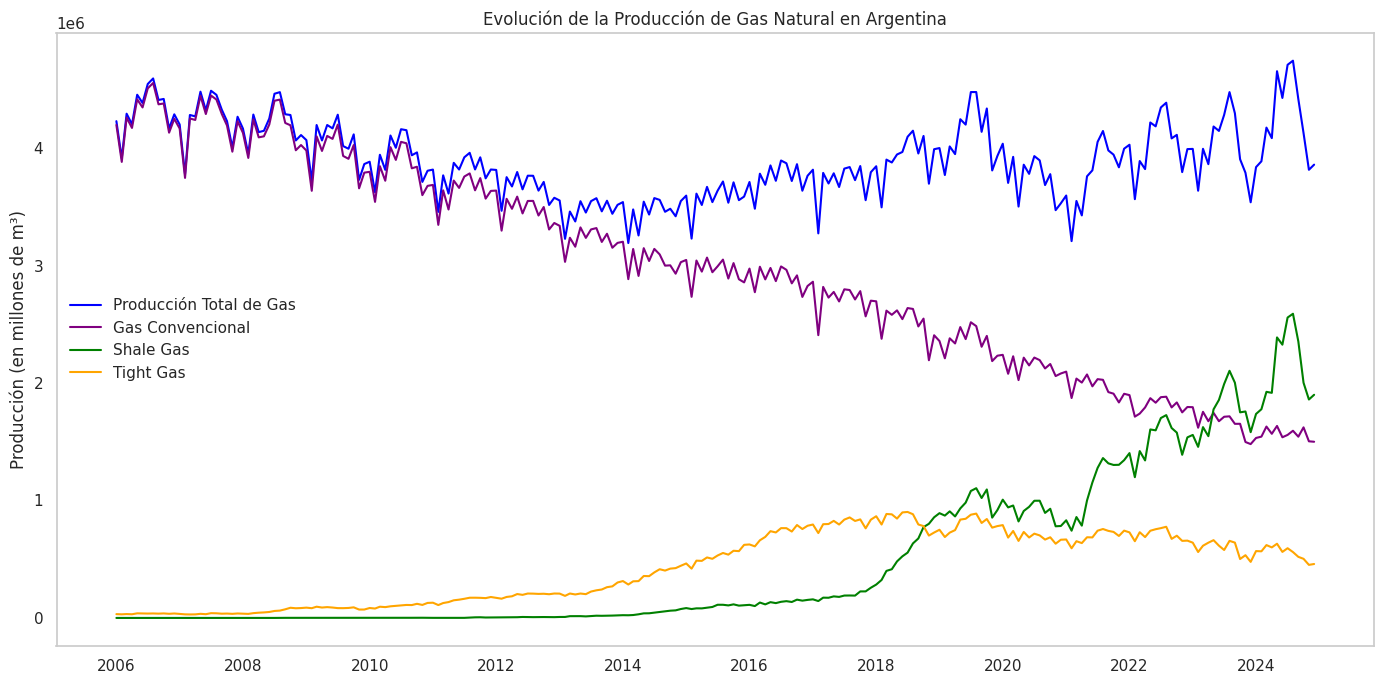

In [259]:
# Calcular producci√≥n convencional (total - shale - tight)
dataset1_filtrado['produccion_convencional'] = dataset1_filtrado['produccion_gas_natural_total'] - dataset1_filtrado['produccion_shale_gas'] - dataset1_filtrado['produccion_tight_gas']

# Ordenar por fecha
dataset1_filtrado = dataset1_filtrado.sort_values('indice_tiempo')

# Estilo del gr√°fico
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Gr√°ficas
plt.plot(dataset1_filtrado['indice_tiempo'], dataset1_filtrado['produccion_gas_natural_total'], label='Producci√≥n Total de Gas', color='blue')
plt.plot(dataset1_filtrado['indice_tiempo'], dataset1_filtrado['produccion_convencional'], label='Gas Convencional', color='purple')
plt.plot(dataset1_filtrado['indice_tiempo'], dataset1_filtrado['produccion_shale_gas'], label='Shale Gas', color='green')
plt.plot(dataset1_filtrado['indice_tiempo'], dataset1_filtrado['produccion_tight_gas'], label='Tight Gas', color='orange')

# Personalizaci√≥n
plt.ylabel('Producci√≥n (en millones de m¬≥)')
plt.title('Evoluci√≥n de la Producci√≥n de Gas Natural en Argentina')
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()

Mientras que en el largo plazo la producci√≥n de gas natural se ha mantenido estable, los √∫ltimos diez a√±os evidencian una etapa de crecimiento moderado pero sostenido, posiblemente impulsado por la expansi√≥n de los desarrollos no convencionales en el pa√≠s.

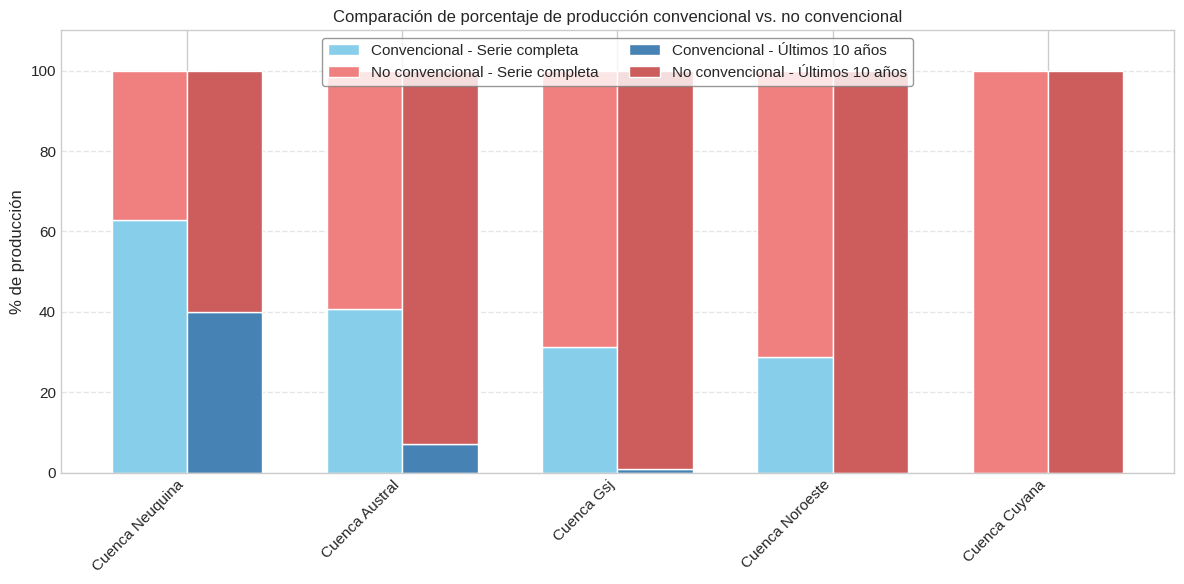

In [321]:
#Serie completa vs √öltimos 10 a√±os

import matplotlib.pyplot as plt
import numpy as np

# Listas para guardar resultados
cuencas_nombres = []
conv_full_list = []
no_conv_full_list = []
conv_10_list = []
no_conv_10_list = []

for cuenca in cuencas:
    # Total por cuenca
    total_full = dataset1_filtrado[cuenca]
    shale_full = dataset1_filtrado['produccion_shale_gas']
    tight_full = dataset1_filtrado['produccion_tight_gas']
    no_conv_full = (shale_full + tight_full) / total_full * 100
    no_conv_full = no_conv_full.clip(upper=100)
    conv_full = 100 - no_conv_full

    # √öltimos 10 a√±os
    total_10 = dataset_10[cuenca]
    shale_10 = dataset_10['produccion_shale_gas']
    tight_10 = dataset_10['produccion_tight_gas']
    no_conv_10 = (shale_10 + tight_10) / total_10 * 100
    no_conv_10 = no_conv_10.clip(upper=100)
    conv_10 = 100 - no_conv_10

    # Guardar promedios
    cuencas_nombres.append(cuenca.replace('produccion_gas_natural_', '').replace('_', ' ').title())
    conv_full_list.append(conv_full.mean())
    no_conv_full_list.append(no_conv_full.mean())
    conv_10_list.append(conv_10.mean())
    no_conv_10_list.append(no_conv_10.mean())

# Preparar gr√°fico
x = np.arange(len(cuencas_nombres))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# Barras: Serie completa
b1 = ax.bar(x - width/2, conv_full_list, width, label='Convencional - Serie completa', color='skyblue')
b2 = ax.bar(x - width/2, no_conv_full_list, width, bottom=conv_full_list, label='No convencional - Serie completa', color='lightcoral')

# Barras: √öltimos 10 a√±os
b3 = ax.bar(x + width/2, conv_10_list, width, label='Convencional - √öltimos 10 a√±os', color='steelblue')
b4 = ax.bar(x + width/2, no_conv_10_list, width, bottom=conv_10_list, label='No convencional - √öltimos 10 a√±os', color='indianred')

# Est√©tica
ax.set_ylabel('% de producci√≥n')
ax.set_title('Comparaci√≥n de porcentaje de producci√≥n convencional vs. no convencional')
ax.set_xticks(x)
ax.set_xticklabels(cuencas_nombres, rotation=45, ha='right')
ax.set_ylim(0, 110)
ax.legend(loc='upper center', frameon=True, facecolor='white', edgecolor='gray', ncol=2)
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


En la √∫ltima d√©cada, la industria del gas natural en Argentina ha experimentado un cambio estructural significativo, impulsado por el desarrollo de recursos no convencionales, particularmente en la Cuenca Neuquina. Este cambio ha transformado la matriz productiva del pa√≠s y tiene implicaciones directas en la forma en que se deben abordar los an√°lisis y modelos predictivos en el sector energ√©tico.

üß± Cambio estructural en la industria
A partir de 2010, la explotaci√≥n de gas no convencional, especialmente en la formaci√≥n Vaca Muerta, ha ganado protagonismo en la producci√≥n nacional. Seg√∫n estudios del CONICET, la producci√≥n de gas no convencional ha aumentado significativamente, representando casi un 40% de la producci√≥n total de gas entre 2010 y 2020. Este crecimiento se debe en parte al declive en la productividad de los pozos convencionales y en parte a la implementaci√≥n de subsidios por parte del Estado .

Este cambio en la matriz productiva implica que los datos hist√≥ricos anteriores a esta transformaci√≥n reflejan una realidad distinta, dominada por la producci√≥n convencional. Incluir estos datos en modelos predictivos actuales puede introducir ruido y disminuir la precisi√≥n de las proyecciones.

‚öôÔ∏è Tendencias tecnol√≥gicas y pol√≠ticas recientes
El desarrollo del gas no convencional ha estado acompa√±ado por avances tecnol√≥gicos en t√©cnicas de extracci√≥n, como la fractura hidr√°ulica, y por pol√≠ticas p√∫blicas que han incentivado la producci√≥n mediante subsidios y mejoras en los precios internos. Estas medidas han sido fundamentales para revertir la tendencia declinante de la producci√≥n hidrocarbur√≠fera que se observaba hasta 2013 .


Adem√°s, la necesidad de infraestructura espec√≠fica, como gasoductos y plantas de licuefacci√≥n, ha sido crucial para el desarrollo a gran escala de Vaca Muerta . Estos cambios tecnol√≥gicos y regulatorios han creado un nuevo contexto que difiere significativamente del pasado, haciendo que los datos antiguos no reflejen adecuadamente las condiciones actuales y futuras del sector.

ü§ñ Implicancias para el modelado predictivo
Dado este cambio estructural, es recomendable que los modelos predictivos se basen en datos de los √∫ltimos 10 a√±os, per√≠odo en el cual se ha consolidado la producci√≥n no convencional. Esto no solo mejora la relevancia y precisi√≥n de las proyecciones, sino que tambi√©n simplifica los modelos al enfocarse en un conjunto de datos m√°s coherente y representativo del contexto actual.



Bibliogrf√≠a: [El Gas No Convencional de Vaca Muerta como recurso estrat√©gico para la Argentina: evoluci√≥n y tendencias](https://https://ri.conicet.gov.ar/bitstream/handle/11336/205308/CONICET_Digital_Nro.8c016886-f766-4f67-8851-b367becd8e74_B.pdf?sequence=2&isAllowed=y)




**DECISI√ìN:** En resumen, la transformaci√≥n de la industria del gas natural en Argentina, marcada por el auge del gas no convencional y respaldada por avances tecnol√≥gicos y pol√≠ticas p√∫blicas, justifica el enfoque en datos recientes para el an√°lisis y la modelizaci√≥n predictiva.

# **Visualizaci√≥n Dataset1**

**An√°lisis de Producci√≥n Total**

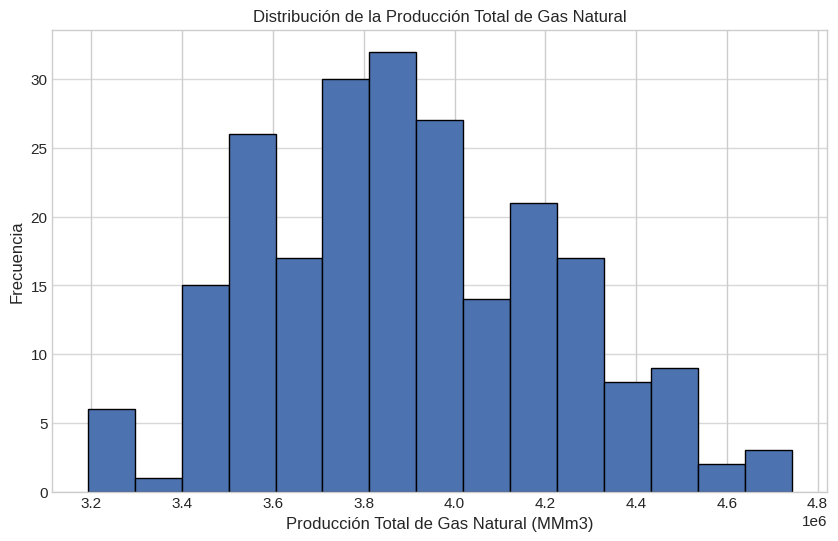

In [322]:
#Histograma- Producci√≥n Total


# Aseg√∫rate de que la columna 'produccion_gas_natural_total' exista en tu DataFrame
if 'produccion_gas_natural_total' in dataset1_10.columns:
    # Generar el histograma
    plt.figure(figsize=(10, 6))
    plt.hist(dataset1_filtrado['produccion_gas_natural_total'], bins=15, edgecolor='black')
    plt.title('Distribuci√≥n de la Producci√≥n Total de Gas Natural')
    plt.xlabel('Producci√≥n Total de Gas Natural (MMm3)')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("La columna 'Producci√≥n Total de Gas Natural (MMm3)' no se encontr√≥ en el DataFrame.")

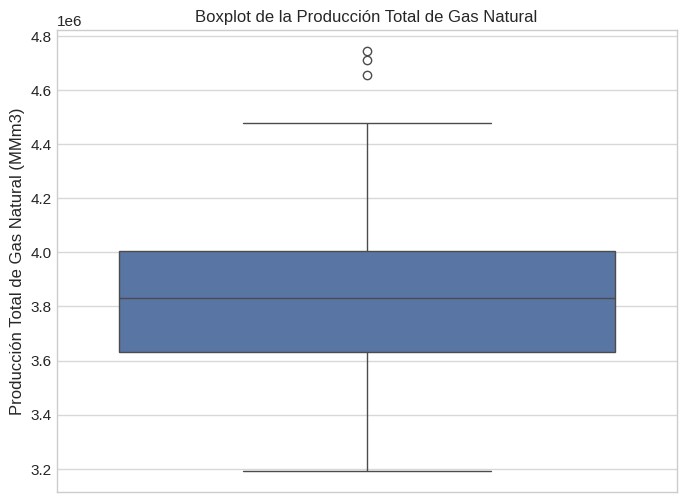

In [323]:
#Boxplot- Producci√≥n Total

if 'produccion_gas_natural_total' in dataset1_10.columns:
    # Generar el boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=dataset1_10['produccion_gas_natural_total'])
    plt.title('Boxplot de la Producci√≥n Total de Gas Natural')
    plt.ylabel('Producci√≥n Total de Gas Natural (MMm3)')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("La columna 'Producci√≥n Total de Gas Natural (MMm3)' no se encontr√≥ en el DataFrame.")


In [324]:
import pandas as pd

columna = 'produccion_gas_natural_total'

if columna in dataset1_10.columns:
    Q1 = dataset1_10[columna].quantile(0.25)
    Q3 = dataset1_10[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = dataset1_10[(dataset1_10[columna] < limite_inferior) | (dataset1_10[columna] > limite_superior)]
    cantidad_outliers = len(outliers)

    print("Cantidad de Valores At√≠picos en la columna '{}': {}".format(columna, cantidad_outliers))

    if cantidad_outliers > 0:
        print("\nValores At√≠picos:")
        print(outliers[columna])
    else:
        print("\nNo se encontraron valores at√≠picos.")
else:
    print("La columna '{}' no se encontr√≥ en el DataFrame.".format(columna))

Cantidad de Valores At√≠picos en la columna 'produccion_gas_natural_total': 3

Valores At√≠picos:
220    4.654371e+06
222    4.709074e+06
223    4.744011e+06
Name: produccion_gas_natural_total, dtype: float64


In [325]:
# Rangos intercuartilicos
Q1 = dataset1_10['produccion_gas_natural_total'].quantile(0.25)
Q3 = dataset1_10['produccion_gas_natural_total'].quantile(0.75)
IQR = Q3 - Q1

# Limite superior para detectar outliers
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = dataset1_10[dataset1_10['produccion_gas_natural_total'] > upper_bound]

print(outliers[['indice_tiempo', 'produccion_gas_natural_total']])

    indice_tiempo  produccion_gas_natural_total
220    2024-05-01                  4.654371e+06
222    2024-07-01                  4.709074e+06
223    2024-08-01                  4.744011e+06


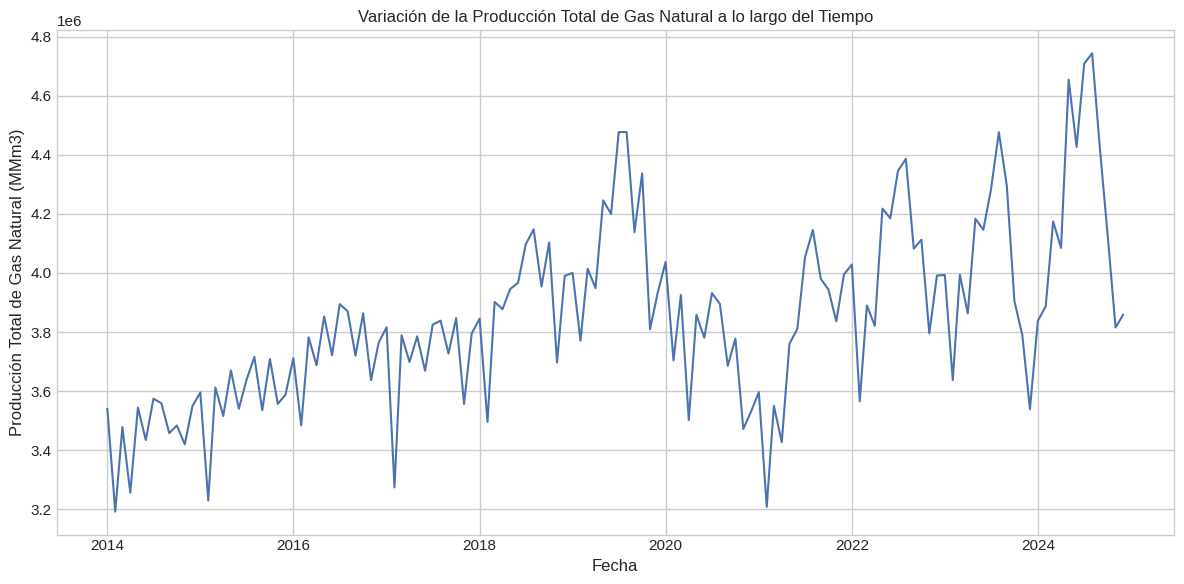

In [326]:
#Variaci√≥n de la producci√≥n a lo largo del tiempo

columna_produccion = 'produccion_gas_natural_total'
columna_fecha = 'indice_tiempo'

if columna_produccion in dataset1_10.columns and columna_fecha in dataset1_10.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=columna_fecha, y=columna_produccion, data=dataset1_10)
    plt.title('Variaci√≥n de la Producci√≥n Total de Gas Natural a lo largo del Tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Producci√≥n Total de Gas Natural (MMm3)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"Aseg√∫rate de que las columnas '{columna_fecha}' y '{columna_produccion}' existan en el DataFrame.")

In [327]:
#Desviaci√≥n Est√°ndar de outliers

outliers_serie = pd.Series([4.654371e+06, 4.709074e+06, 4.744011e+06])

# Calcular la desviaci√≥n est√°ndar de los outliers
desviacion_estandar_outliers = outliers_serie.std()

print(f"Desviaci√≥n Est√°ndar de los Outliers: {desviacion_estandar_outliers:.2f}")

# Ventana de tama√±o 2
if len(outliers_serie) >= 2:
    desviacion_estandar_movil_2 = outliers_serie.rolling(window=2).std()
    print("\nDesviaci√≥n Est√°ndar M√≥vil (ventana=2):")
    print(desviacion_estandar_movil_2)

# Ventana de tama√±o 3
if len(outliers_serie) >= 3:
    desviacion_estandar_movil_3 = outliers_serie.rolling(window=3).std()
    print("\nDesviaci√≥n Est√°ndar M√≥vil (ventana=3):")
    print(desviacion_estandar_movil_3)

Desviaci√≥n Est√°ndar de los Outliers: 45181.75

Desviaci√≥n Est√°ndar M√≥vil (ventana=2):
0             NaN
1    38680.862251
2    24704.189614
dtype: float64

Desviaci√≥n Est√°ndar M√≥vil (ventana=3):
0            NaN
1            NaN
2    45181.74738
dtype: float64


Dado que solo tenemos tres outliers, el c√°lculo de la desviaci√≥n est√°ndar m√≥vil no revela tendencias significativas en la volatilidad de estos puntos at√≠picos. La desviaci√≥n est√°ndar simple de los tres valores es la medida m√°s informativa en este caso, indicando que los valores at√≠picos, aunque significativamente altos en comparaci√≥n con el resto de los datos, est√°n relativamente cercanos entre s√≠ en magnitud.

In [328]:
#Investigaci√≥n de outliers

fechas_outliers = pd.to_datetime(['2024-05-01', '2024-07-01', '2024-08-01'])
columnas_cuencas = [
    'produccion_gas_natural_cuenca_austral',
    'produccion_gas_natural_cuenca_gsj',
    'produccion_gas_natural_cuenca_neuquina',
    'produccion_gas_natural_cuenca_noroeste',
    'produccion_gas_natural_cuenca_cuyana'
]

# Filtrar el DataFrame por las fechas de los outliers
registros_outliers = dataset1_10[dataset1_10['indice_tiempo'].isin(fechas_outliers)].copy()

print("Producci√≥n por cuenca (orden descendente) en las fechas de sobreproducci√≥n:")
for index, row in registros_outliers.iterrows():
    fecha = row['indice_tiempo'].strftime('%Y-%m-%d')
    produccion_por_cuenca = {}
    for cuenca in columnas_cuencas:
        produccion_por_cuenca[cuenca] = row[cuenca]

    # Ordenar las cuencas por producci√≥n en orden descendente
    sorted_cuencas = sorted(produccion_por_cuenca.items(), key=lambda item: item[1], reverse=True)

    print(f"\nFecha: {fecha}")
    for cuenca, produccion in sorted_cuencas:
        print(f"  {cuenca}: {produccion:.2f}")

# Producci√≥n Total en las fechas de sobreproducci√≥n (sin ordenar)
columna_total = 'produccion_gas_natural_total'
if columna_total in registros_outliers.columns:
    print(f"\nProducci√≥n Total en las fechas de sobreproducci√≥n:")
    print(registros_outliers[['indice_tiempo', columna_total]])
else:
    print(f"\nLa columna '{columna_total}' no se encontr√≥ en los registros de outliers.")

Producci√≥n por cuenca (orden descendente) en las fechas de sobreproducci√≥n:

Fecha: 2024-05-01
  produccion_gas_natural_cuenca_neuquina: 3439697.65
  produccion_gas_natural_cuenca_austral: 772023.95
  produccion_gas_natural_cuenca_gsj: 333597.13
  produccion_gas_natural_cuenca_noroeste: 104719.05
  produccion_gas_natural_cuenca_cuyana: 4333.64

Fecha: 2024-07-01
  produccion_gas_natural_cuenca_neuquina: 3544369.00
  produccion_gas_natural_cuenca_austral: 744960.72
  produccion_gas_natural_cuenca_gsj: 312646.06
  produccion_gas_natural_cuenca_noroeste: 103516.44
  produccion_gas_natural_cuenca_cuyana: 3581.38

Fecha: 2024-08-01
  produccion_gas_natural_cuenca_neuquina: 3560944.37
  produccion_gas_natural_cuenca_austral: 743659.49
  produccion_gas_natural_cuenca_gsj: 331390.89
  produccion_gas_natural_cuenca_noroeste: 104424.14
  produccion_gas_natural_cuenca_cuyana: 3592.27

Producci√≥n Total en las fechas de sobreproducci√≥n:
    indice_tiempo  produccion_gas_natural_total
220    202

La sobreproducci√≥n de gas natural observada en mayo, julio y agosto de 2024 parece estar fuertemente impulsada por la alta producci√≥n de la Cuenca Neuquina. Esto sugiere que cualquier factor que haya afectado la producci√≥n total al alza en esas fechas probablemente tuvo un impacto significativo en la actividad productiva de esta cuenca en particular. Las dem√°s cuencas, aunque importantes para la producci√≥n general, no parecen ser los principales impulsores de estos picos de sobreproducci√≥n.

**DECISI√ìN:** Mnatener los outliers ya que son parte de eventos inusuales, pero no errores, que forman parte de la realidad de la producci√≥n de gas.

**An√°lisis de Cuencas**

'produccion_gas_natural_cuenca_austral',
'produccion_gas_natural_cuenca_gsj',
'produccion_gas_natural_cuenca_neuquina,'produccion_gas_natural_cuenca_noroeste', 'produccion_gas_natural_cuenca_cuyana'

Columnas de cuencas encontradas: ['produccion_gas_natural_cuenca_austral', 'produccion_gas_natural_cuenca_gsj', 'produccion_gas_natural_cuenca_neuquina', 'produccion_gas_natural_cuenca_noroeste', 'produccion_gas_natural_cuenca_cuyana']


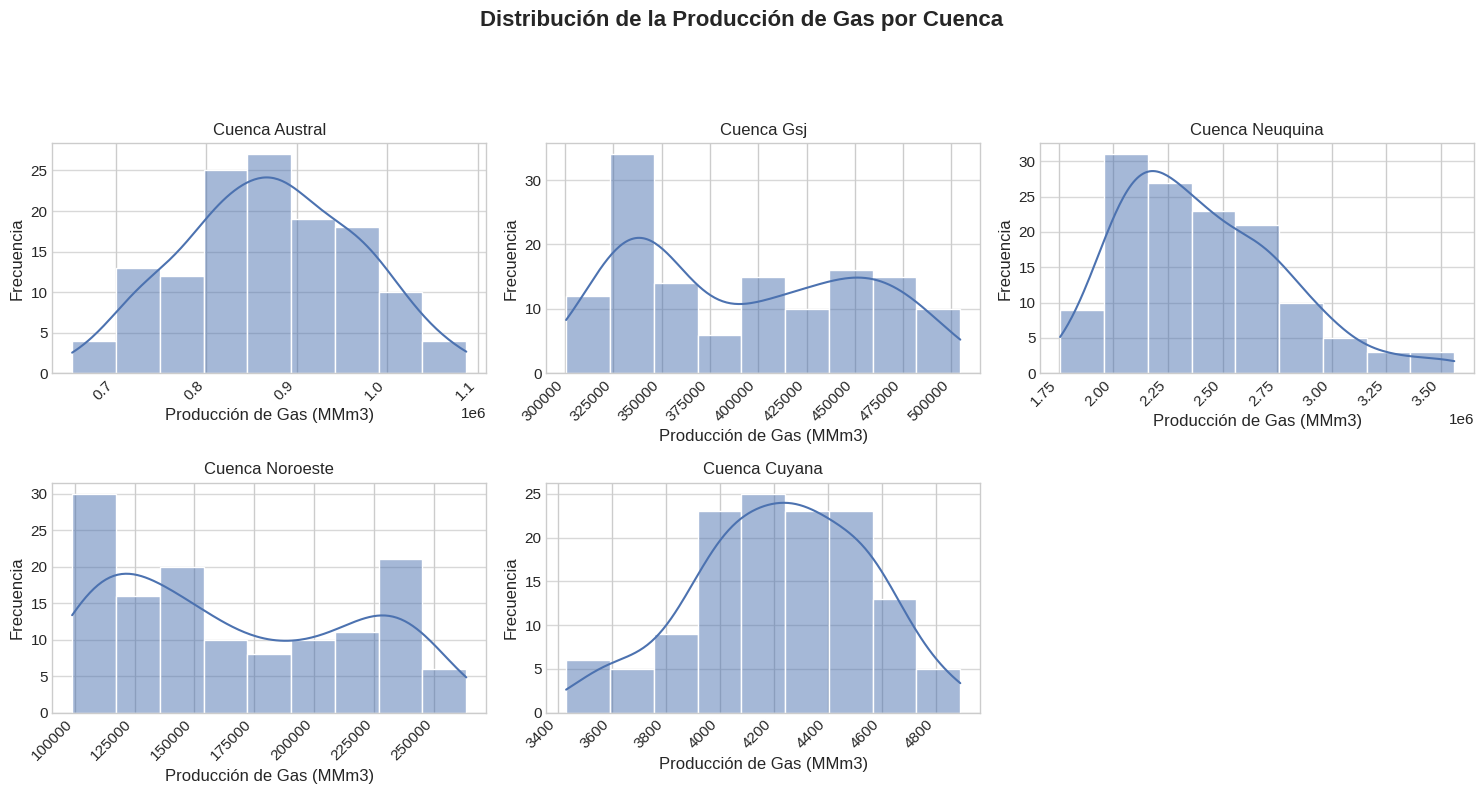

In [329]:
#An√°lisis por cuencas
cuencas_cols = [col for col in dataset1_10.columns if 'produccion_gas_natural_cuenca_' in col]
print(f"Columnas de cuencas encontradas: {cuencas_cols}")

# Definir el n√∫mero de filas y columnas para los subplots
n_filas = 2
n_cols = 3

# Crear la figura con los subplots
fig, axes = plt.subplots(n_filas, n_cols, figsize=(15, 8))
fig.suptitle('Distribuci√≥n de la Producci√≥n de Gas por Cuenca', fontsize=16, fontweight='bold', y=1.02)

# Aplanar el array de axes
axes = axes.flatten()

# Iterar sobre las columnas de las cuencas y crear un histograma para cada una
for i, cuenca_col in enumerate(cuencas_cols):
    if i < len(axes):
        sns.histplot(dataset1_10[cuenca_col], kde=True, ax=axes[i])
        cuenca_nombre = cuenca_col.replace('produccion_gas_natural_cuenca_', '').replace('_', ' ').title()
        axes[i].set_title(f'Cuenca {cuenca_nombre}')
        axes[i].set_xlabel('Producci√≥n de Gas (MMm3)')
        axes[i].set_ylabel('Frecuencia')
        axes[i].grid(axis='y', alpha=0.75)
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right") # Rotar etiquetas del eje x

# Eliminar los subplots vac√≠os
if len(cuencas_cols) < n_filas * n_cols:
    for j in range(len(cuencas_cols), n_filas * n_cols):
        fig.delaxes(axes[j])

# Ajustar el dise√±o
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

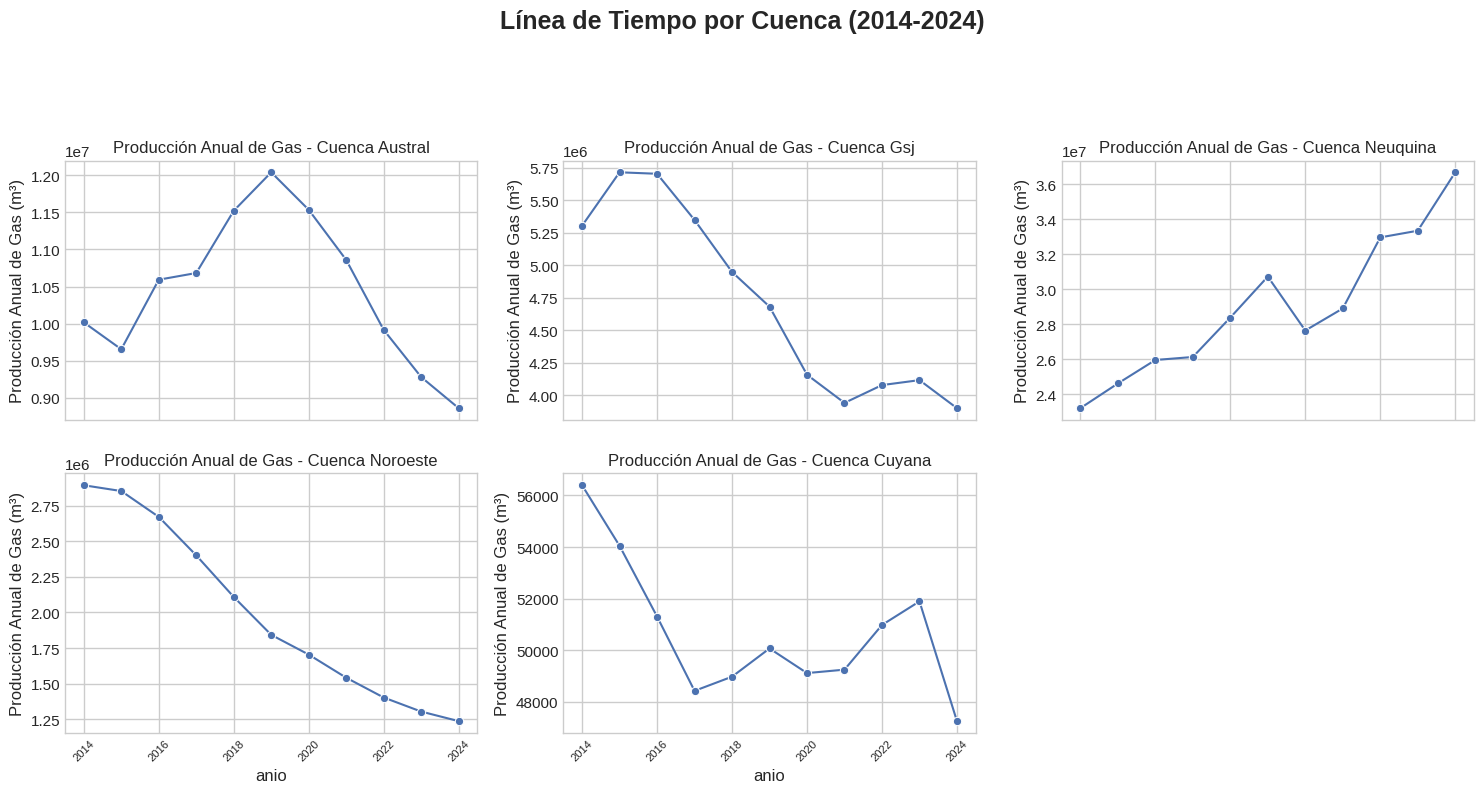

In [330]:
#Linea- Producci√≥n Cuencas

# 1. Preparar los datos
dataset1_10['indice_tiempo'] = pd.to_datetime(dataset1_10['indice_tiempo'])
dataset1_10['anio'] = dataset1_10['indice_tiempo'].dt.year

# Lista de todas las columnas de cuencas
cuencas_cols = [
    'produccion_gas_natural_cuenca_austral',
    'produccion_gas_natural_cuenca_gsj',
    'produccion_gas_natural_cuenca_neuquina',
    'produccion_gas_natural_cuenca_noroeste',
    'produccion_gas_natural_cuenca_cuyana'
]

# Definir el n√∫mero de filas y columnas para los subplots
n_filas = 2
n_cols = 3

# Crear una figura con los subplots
fig, axes = plt.subplots(n_filas, n_cols, figsize=(15, 8), sharex=True)

# T√≠tulo general para todos los gr√°ficos
fig.suptitle('L√≠nea de Tiempo por Cuenca (2014-2024)', fontsize=18, fontweight='bold', y=1.02)

# Aplanar el array de axes para facilitar la iteraci√≥n
axes = axes.flatten()

# Iterar sobre las columnas de las cuencas y crear un gr√°fico para cada una
for i, cuenca_col in enumerate(cuencas_cols):
    # Seleccionar los datos de la cuenca actual
    dataset_cuenca = dataset1_10[['anio', cuenca_col]].copy()

    # Agrupar por a√±o y sumar la producci√≥n
    dataset_cuenca_anual = dataset_cuenca.groupby('anio', as_index=False).sum()

    # Graficar la producci√≥n de gas a lo largo del tiempo
    sns.lineplot(x='anio', y=cuenca_col, data=dataset_cuenca_anual, marker='o', ax=axes[i])

    # Personalizar el t√≠tulo y las etiquetas del eje y
    cuenca_nombre = cuenca_col.replace('produccion_gas_natural_cuenca_', '').replace('_', ' ').title()
    axes[i].set_title(f'Producci√≥n Anual de Gas - Cuenca {cuenca_nombre}')
    axes[i].set_ylabel('Producci√≥n Anual de Gas (m¬≥)')
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)

# Eliminar los subplots vac√≠os si hay menos cuencas que el n√∫mero total de subplots
if len(cuencas_cols) < n_filas * n_cols:
    for j in range(len(cuencas_cols), n_filas * n_cols):
        fig.delaxes(axes[j])

# Ajustar el dise√±o para evitar superposiciones
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

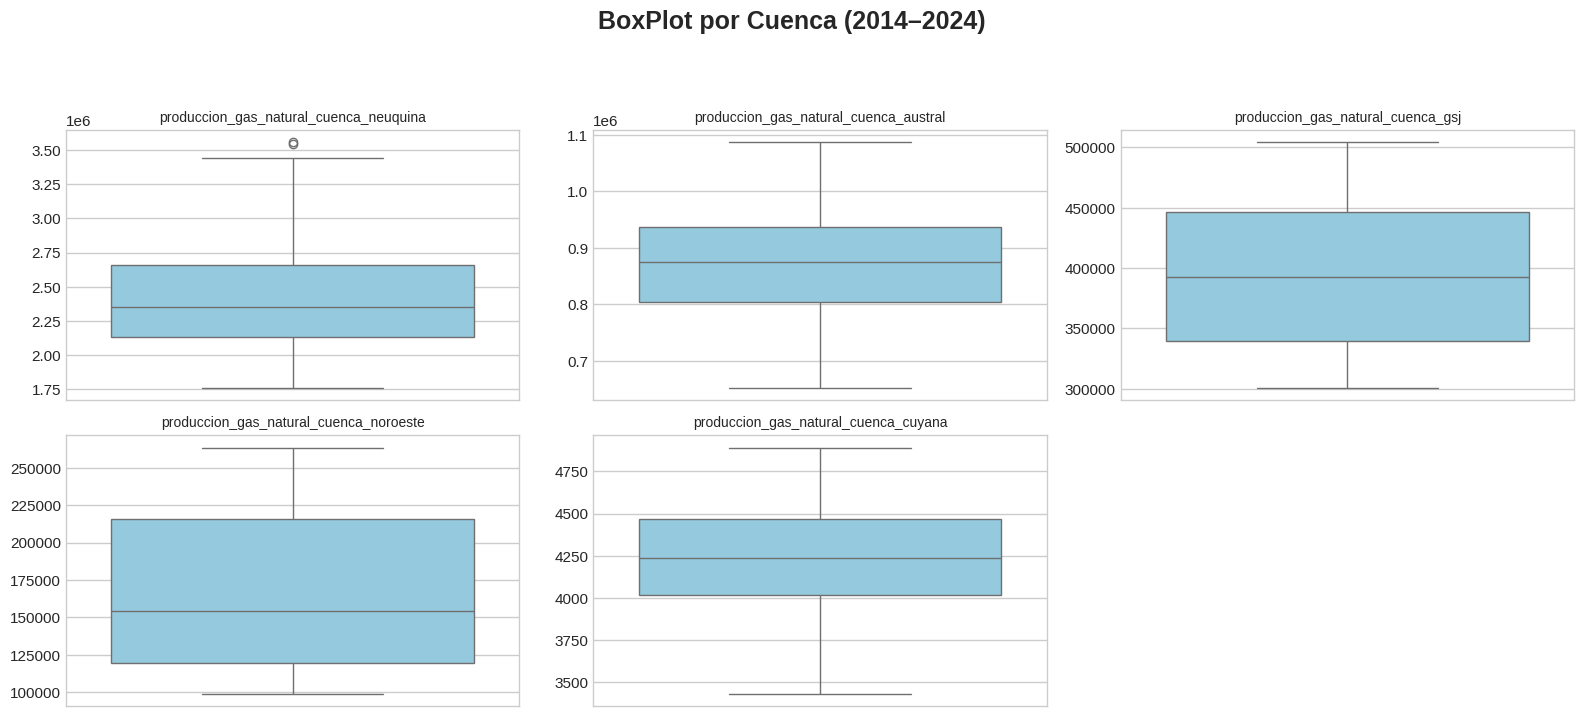

In [331]:
#Boxplot- Producci√≥n Cuencas

# Asegurarse de que 'indice_tiempo' sea datetime
dataset1_10['indice_tiempo'] = pd.to_datetime(dataset1_10['indice_tiempo'])
dataset1_10['anio'] = dataset1_10['indice_tiempo'].dt.year

# Columnas num√©ricas a graficar
columnas_numericas = [
    'produccion_gas_natural_cuenca_neuquina',
    'produccion_gas_natural_cuenca_austral',
    'produccion_gas_natural_cuenca_gsj',
    'produccion_gas_natural_cuenca_noroeste',
    'produccion_gas_natural_cuenca_cuyana'
]

# Crear los boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=dataset1_10[col], color='skyblue')
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

# T√≠tulo general
plt.suptitle('BoxPlot por Cuenca (2014‚Äì2024)', fontsize=18, fontweight='bold', y=1.02)

# Ajuste final
plt.subplots_adjust(top=0.9)
plt.show()

In [333]:
# Identificar valores at√≠picos en cuenca neuquina

columna = 'produccion_gas_natural_cuenca_neuquina'

# Filtrar el DataFrame para el per√≠odo 2014-2024

df_periodo = dataset1_10[(dataset1_10['anio'] >= 2014) & (dataset1_10['anio'] <= 2024)].copy()

if columna in df_periodo.columns:
    Q1 = df_periodo[columna].quantile(0.25)
    Q3 = df_periodo[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df_periodo[(df_periodo[columna] < limite_inferior) | (df_periodo[columna] > limite_superior)]
    cantidad_outliers = len(outliers)

    print(f"Cantidad de Valores At√≠picos en la columna '{columna}' (2014-2024): {cantidad_outliers}")

    if cantidad_outliers > 0:
        print("\nValores At√≠picos (2014-2024):")
        print(outliers[[columna, 'indice_tiempo']])  # Mostrar la fecha para investigar
    else:
        print("\nNo se encontraron valores at√≠picos (2014-2024).")
else:
    print(f"La columna '{columna}' no se encontr√≥ en el DataFrame filtrado.")

Cantidad de Valores At√≠picos en la columna 'produccion_gas_natural_cuenca_neuquina' (2014-2024): 2

Valores At√≠picos (2014-2024):
     produccion_gas_natural_cuenca_neuquina indice_tiempo
222                            3.544369e+06    2024-07-01
223                            3.560944e+06    2024-08-01


Los dos valores at√≠picos identificados en la producci√≥n de la Cuenca Neuquina para julio y agosto de 2024, coinciden con dos de los tres valores identificados como outliers en la Producci√≥n Total de Gas, por lo que su tratamiento sera igual que en el analisis de dicho feature.


**DECISI√ìN:** Estos valores se mantendr√°n en el an√°lisis, en coherencia con la decisi√≥n tomada para los picos de sobreproducci√≥n observados en la producci√≥n total de gas durante las mismas fechas. Estos valores no son errores, sino que reflejan eventos reales que impactaron significativamente la producci√≥n de la cuenca, contribuyendo a la sobreproducci√≥n general. Conservarlos asegura la integridad del registro hist√≥rico de la Cuenca Neuquina y permite comprender su respuesta ante eventos inusuales, proporcionando informaci√≥n valiosa para el an√°lisis.

**An√°lisis de Tipo de Gas: Convencional- No Convencional**


'participacion_convencional', 'participacion_no_convencional'

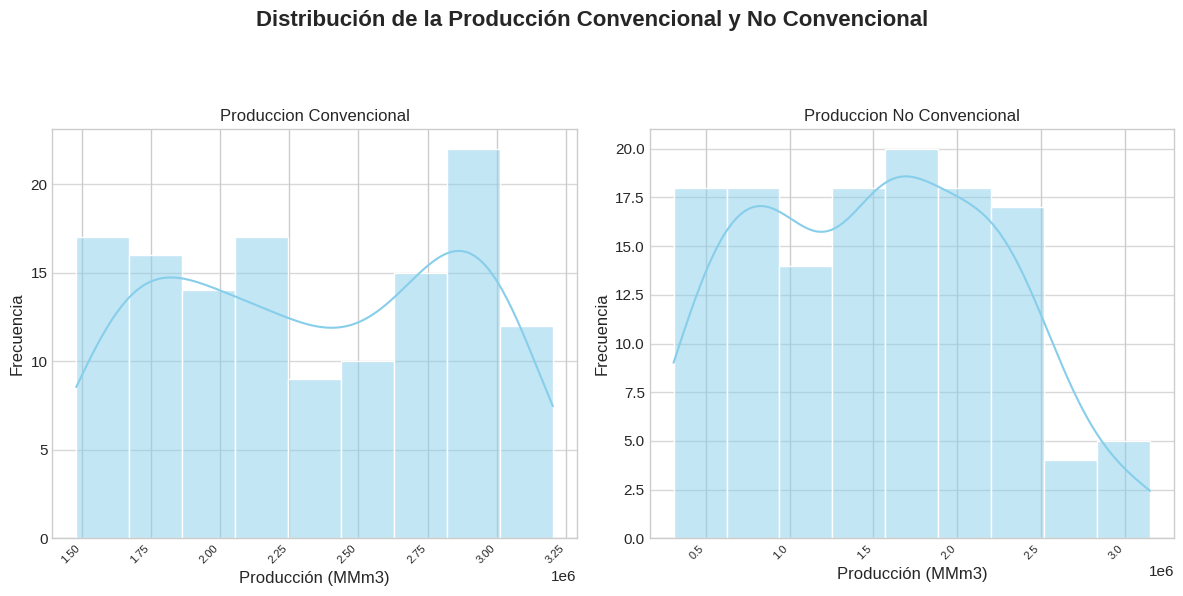

In [334]:
#Histograma-Tipo de Gas: Convencional- No Convencional

# Calcular la producci√≥n no convencional total
dataset1_10['produccion_no_convencional'] = dataset1_10['produccion_shale_gas'] + dataset1_10['produccion_tight_gas']

# Calcular la producci√≥n convencional restando la no convencional de la total
dataset1_10['produccion_convencional'] = dataset1_10['produccion_gas_natural_total'] - dataset1_10['produccion_no_convencional']

# Columnas para el primer histograma
cols_convencional_no_convencional = [
    'produccion_convencional',
    'produccion_no_convencional'
]

# Crear la primera figura con subplots
fig1, axes1 = plt.subplots(1, len(cols_convencional_no_convencional), figsize=(12, 6))
fig1.suptitle('Distribuci√≥n de la Producci√≥n Convencional y No Convencional', fontsize=16, fontweight='bold', y=1.02)

axes1 = axes1.flatten() if len(cols_convencional_no_convencional) > 1 else [axes1]

for i, col in enumerate(cols_convencional_no_convencional):
    sns.histplot(dataset1_10[col], kde=True, ax=axes1[i], color='skyblue')
    col_nombre = col.replace('_', ' ').title()
    axes1[i].set_title(f'{col_nombre}')
    axes1[i].set_xlabel('Producci√≥n (MMm3)')
    axes1[i].set_ylabel('Frecuencia')
    axes1[i].grid(axis='y', alpha=0.75)
    plt.setp(axes1[i].get_xticklabels(), rotation=45, ha="right", fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

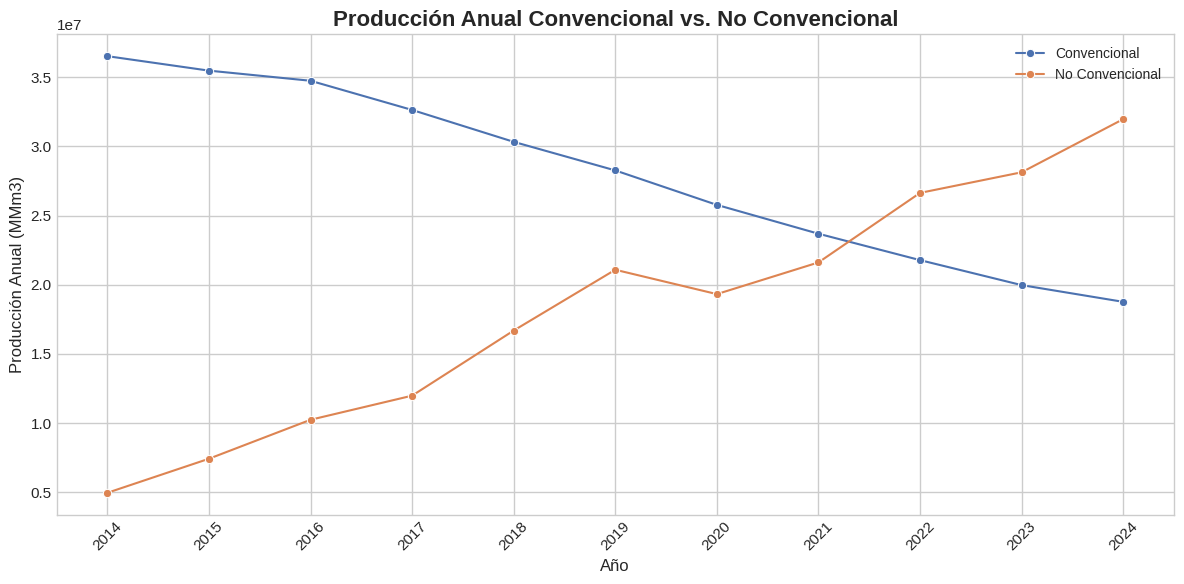

In [335]:
#Linea de Tiempo -Tipo de Gas: Convencional- No Convencional

# Agrupar por a√±o y sumar la producci√≥n convencional y no convencional
produccion_anual = dataset1_10.groupby('anio', as_index=False)[['produccion_convencional', 'produccion_no_convencional']].sum()

# Crear la figura y el subplot
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid') # Opcional: mejora el estilo

# Graficar la producci√≥n convencional
sns.lineplot(x='anio', y='produccion_convencional', data=produccion_anual, marker='o', label='Convencional')

# Graficar la producci√≥n no convencional
sns.lineplot(x='anio', y='produccion_no_convencional', data=produccion_anual, marker='o', label='No Convencional')

# Personalizar el gr√°fico
plt.title('Producci√≥n Anual Convencional vs. No Convencional', fontsize=16, fontweight='bold')
plt.xlabel('A√±o', fontsize=12)
plt.ylabel('Producci√≥n Anual (MMm3)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(produccion_anual['anio'].unique().astype(int), rotation=45)
plt.tight_layout()
plt.show()

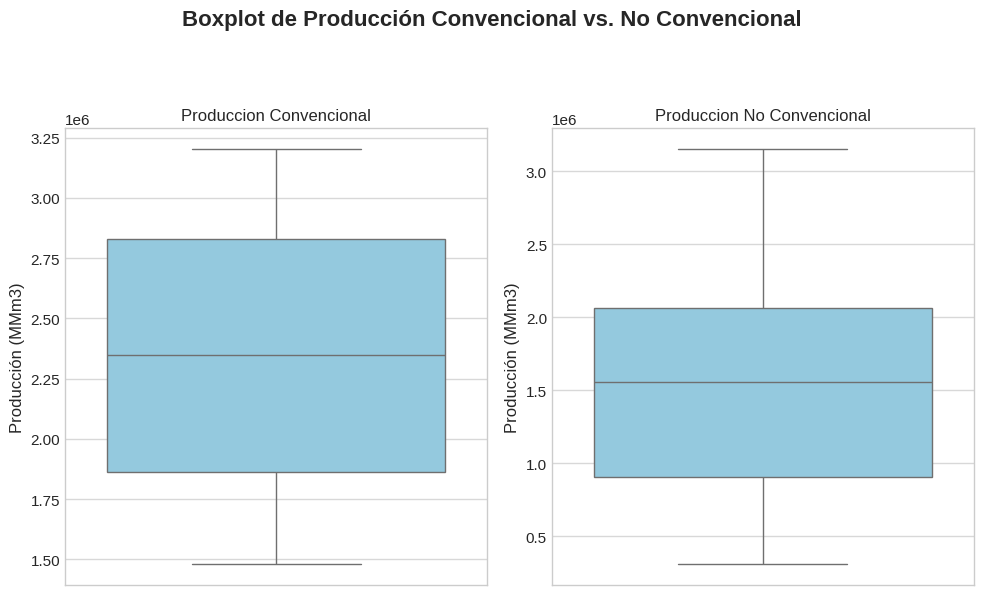

In [336]:
#Boxplot-Tipo de Gas: Convencional- No Convencional

# Columnas para el boxplot
cols_convencional_no_convencional = [
    'produccion_convencional',
    'produccion_no_convencional'
]

# Crear la figura y los subplots
fig, axes = plt.subplots(1, len(cols_convencional_no_convencional), figsize=(10, 6))
fig.suptitle('Boxplot de Producci√≥n Convencional vs. No Convencional', fontsize=16, fontweight='bold', y=1.02)

# Aplanar el array de axes si solo hay un subplot
if len(cols_convencional_no_convencional) == 1:
    axes = [axes]

# Iterar sobre las columnas y crear un boxplot para cada una
for i, col in enumerate(cols_convencional_no_convencional):
    sns.boxplot(y=dataset1_10[col], ax=axes[i], color='skyblue')
    col_nombre = col.replace('_', ' ').title()
    axes[i].set_title(col_nombre)
    axes[i].set_ylabel('Producci√≥n (MMm3)')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**An√°lisis de No Convencinal: Shale-Tight**


'produccion_shale_gas',
'produccion_tight_gas'

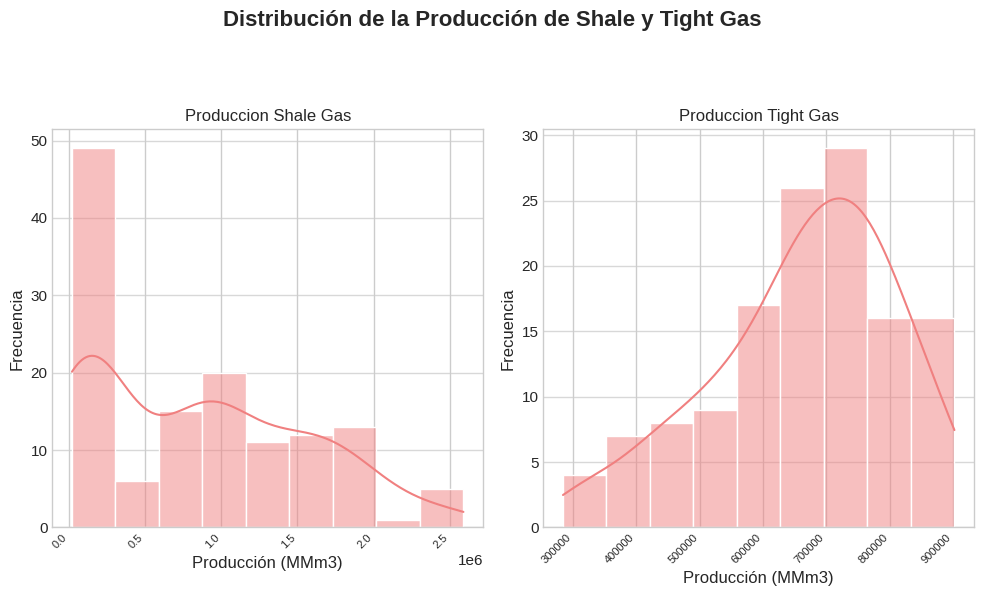

In [337]:
#Histograma:  No Convencinal: Shale-Tight

# Columnas para el segundo histograma
cols_shale_tight = [
    'produccion_shale_gas',
    'produccion_tight_gas'
]

# Crear la segunda figura con subplots
fig2, axes2 = plt.subplots(1, len(cols_shale_tight), figsize=(10, 6))
fig2.suptitle('Distribuci√≥n de la Producci√≥n de Shale y Tight Gas', fontsize=16, fontweight='bold', y=1.02)

axes2 = axes2.flatten() if len(cols_shale_tight) > 1 else [axes2]

for i, col in enumerate(cols_shale_tight):
    sns.histplot(dataset1_10[col], kde=True, ax=axes2[i], color='lightcoral')
    col_nombre = col.replace('_', ' ').title()
    axes2[i].set_title(f'{col_nombre}')
    axes2[i].set_xlabel('Producci√≥n (MMm3)')
    axes2[i].set_ylabel('Frecuencia')
    axes2[i].grid(axis='y', alpha=0.75)
    plt.setp(axes2[i].get_xticklabels(), rotation=45, ha="right", fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

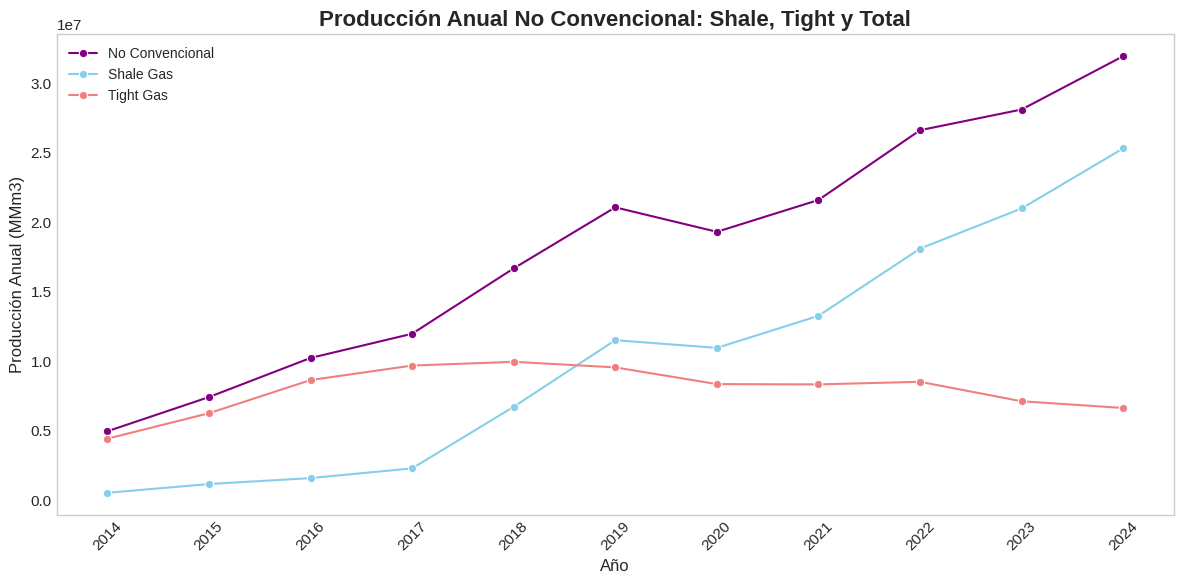

In [338]:
#Linea de Tiempo:  No Convencinal: Shale-Tight

# Calcular la producci√≥n no convencional total
if 'produccion_no_convencional' not in dataset1_10.columns:
    dataset1_10['produccion_no_convencional'] = dataset1_10['produccion_shale_gas'] + dataset1_10['produccion_tight_gas']

# Agrupar por a√±o y sumar la producci√≥n
produccion_anual_no_convencional = dataset1_10.groupby('anio', as_index=False)[['produccion_shale_gas', 'produccion_tight_gas', 'produccion_no_convencional']].sum()

# Crear la figura y el subplot
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Graficar la producci√≥n no convencional total
sns.lineplot(x='anio', y='produccion_no_convencional', data=produccion_anual_no_convencional, marker='o', label='No Convencional', color='purple')

# Graficar la producci√≥n de shale gas
sns.lineplot(x='anio', y='produccion_shale_gas', data=produccion_anual_no_convencional, marker='o', label='Shale Gas', color='skyblue')

# Graficar la producci√≥n de tight gas
sns.lineplot(x='anio', y='produccion_tight_gas', data=produccion_anual_no_convencional, marker='o', label='Tight Gas', color='lightcoral')

# Personalizar el gr√°fico
plt.title('Producci√≥n Anual No Convencional: Shale, Tight y Total', fontsize=16, fontweight='bold')
plt.xlabel('A√±o', fontsize=12)
plt.ylabel('Producci√≥n Anual (MMm3)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(False)
plt.xticks(produccion_anual_no_convencional['anio'].unique().astype(int), rotation=45)
plt.tight_layout()
plt.show()

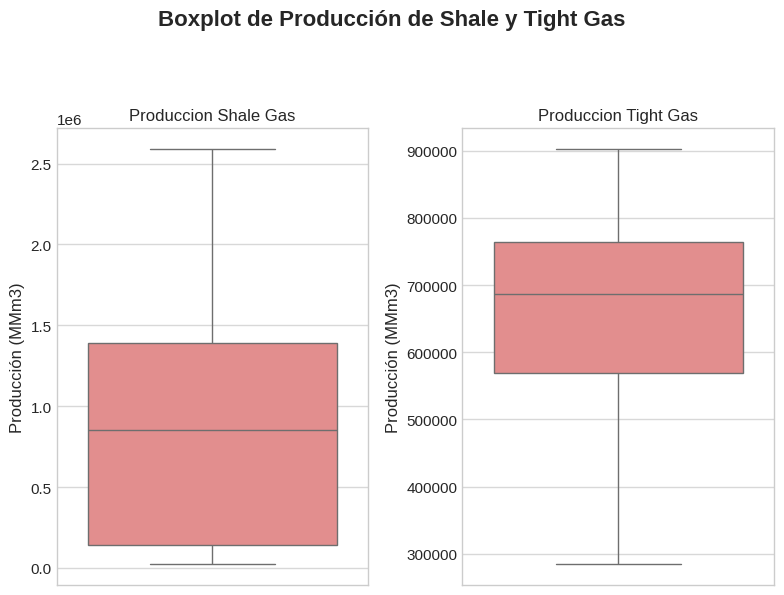

In [339]:
#Boxplot:  No Convencinal: Shale-Tight

# Columnas para el boxplot
cols_shale_tight = [
    'produccion_shale_gas',
    'produccion_tight_gas'
]

# Crear la figura y los subplots
fig, axes = plt.subplots(1, len(cols_shale_tight), figsize=(8, 6))
fig.suptitle('Boxplot de Producci√≥n de Shale y Tight Gas', fontsize=16, fontweight='bold', y=1.02)

# Aplanar el array de axes si solo hay un subplot
if len(cols_shale_tight) == 1:
    axes = [axes]

# Iterar sobre las columnas y crear un boxplot para cada una
for i, col in enumerate(cols_shale_tight):
    sns.boxplot(y=dataset1_10[col], ax=axes[i], color='lightcoral')
    col_nombre = col.replace('_', ' ').title()
    axes[i].set_title(col_nombre)
    axes[i].set_ylabel('Producci√≥n (MMm3)')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Transformaci√≥n de Datos del Dataset1**

In [340]:
# Indice_tiempo pasar a 'anio' y 'mes'

# Asegur√©monos de que la columna 'indice_tiempo' sea de tipo datetime
dataset1_10['indice_tiempo'] = pd.to_datetime(dataset1_10['indice_tiempo'])

# Crear la columna 'anio' como entero
dataset1_10['anio'] = dataset1_10['indice_tiempo'].dt.year.astype(int)

# Crear la columna 'mes' como entero
dataset1_10['mes'] = dataset1_10['indice_tiempo'].dt.month.astype(int)

# Mostrar las primeras filas del DataFrame con las nuevas columnas
print(dataset1_10[['indice_tiempo', 'anio', 'mes']].head())

# Verificar los tipos de datos de las nuevas columnas
print("\nTipos de datos de las nuevas columnas:")
print(dataset1_10[['anio', 'mes']].dtypes)

    indice_tiempo  anio  mes
96     2014-01-01  2014    1
97     2014-02-01  2014    2
98     2014-03-01  2014    3
99     2014-04-01  2014    4
100    2014-05-01  2014    5

Tipos de datos de las nuevas columnas:
anio    int64
mes     int64
dtype: object


In [341]:
#Eliminar feature Produccion_gas_natural_total_diario

# Verificar si la columna existe antes de intentar eliminarla
if 'produccion_gas_natural_total_diario' in dataset1_10.columns:
    # Eliminar la columna
    dataset1_10 = dataset1_10.drop(columns=['produccion_gas_natural_total_diario'])
    print("La columna 'produccion_gas_natural_total_diario' ha sido eliminada.")
else:
    print("La columna 'produccion_gas_natural_total_diario' no existe en el DataFrame.")

# Verificar que la columna ya no est√° en el DataFrame
print("\nColumnas actuales del DataFrame:")
print(dataset1_10.columns)

La columna 'produccion_gas_natural_total_diario' no existe en el DataFrame.

Columnas actuales del DataFrame:
Index(['indice_tiempo', 'produccion_gas_natural_cuenca_austral',
       'produccion_gas_natural_cuenca_gsj',
       'produccion_gas_natural_cuenca_neuquina',
       'produccion_gas_natural_cuenca_noroeste',
       'produccion_gas_natural_cuenca_cuyana', 'produccion_gas_natural_total',
       'produccion_shale_gas', 'produccion_tight_gas', 'anio',
       'produccion_no_convencional', 'produccion_convencional', 'mes'],
      dtype='object')


In [342]:
#Eliminar 'participacion_no_convencional'

# Verificar si la columna existe antes de intentar eliminarla
if 'participacion_no_convencional' in dataset1_10.columns:
    # Eliminar la columna
    dataset1_10 = dataset1_10.drop(columns=['participacion_no_convencional'])
    print("La columna 'participacion_no_convencional' ha sido eliminada.")
else:
    print("La columna 'participacion_no_convencional' no existe en el DataFrame.")

# Verificar que la columna ya no est√° en el DataFrame imprimiendo las columnas
print("\nColumnas actuales del DataFrame:")
print(dataset1_10.columns)

La columna 'participacion_no_convencional' no existe en el DataFrame.

Columnas actuales del DataFrame:
Index(['indice_tiempo', 'produccion_gas_natural_cuenca_austral',
       'produccion_gas_natural_cuenca_gsj',
       'produccion_gas_natural_cuenca_neuquina',
       'produccion_gas_natural_cuenca_noroeste',
       'produccion_gas_natural_cuenca_cuyana', 'produccion_gas_natural_total',
       'produccion_shale_gas', 'produccion_tight_gas', 'anio',
       'produccion_no_convencional', 'produccion_convencional', 'mes'],
      dtype='object')


**Normalizaci√≥n de Datos del Dataset1**

In [343]:
#StandardScaler para 'produccion_gas_natural_total' y 'produccion_gas_natural_cuenca_neuquina'

from sklearn.preprocessing import StandardScaler

def aplicar_standard_scaler(df, columnas):

    dataset1_10_escalado = dataset1_10.copy()
    scaler = StandardScaler()
    dataset1_10_escalado[columnas] = scaler.fit_transform(dataset1_10[columnas])
    return dataset1_10_escalado

# Columnas a escalar con StandardScaler
columnas_a_escalar = ['produccion_gas_natural_total', 'produccion_gas_natural_cuenca_neuquina']

# Aplicar la funci√≥n de escalado
dataset1_10_escalado_standard = aplicar_standard_scaler(dataset1_10, columnas_a_escalar)

# Mostrar las primeras filas de las columnas originales y escaladas para comparar
print("Primeras filas de las columnas originales:")
print(dataset1_10[columnas_a_escalar].head())

print("\nPrimeras filas de las columnas escaladas con StandardScaler:")
print(dataset1_10_escalado_standard[columnas_a_escalar].head())

# Puedes verificar las medias y desviaciones est√°ndar aproximadas de las columnas escaladas
print("\nMedias de las columnas escaladas:")
print(dataset1_10_escalado_standard[columnas_a_escalar].mean())

print("\nDesviaciones est√°ndar de las columnas escaladas:")
print(dataset1_10_escalado_standard[columnas_a_escalar].std())

Primeras filas de las columnas originales:
     produccion_gas_natural_total  produccion_gas_natural_cuenca_neuquina
96                   3.540197e+06                            1.944920e+06
97                   3.191665e+06                            1.756761e+06
98                   3.477941e+06                            1.885451e+06
99                   3.256041e+06                            1.833150e+06
100                  3.543987e+06                            1.966218e+06

Primeras filas de las columnas escaladas con StandardScaler:
     produccion_gas_natural_total  produccion_gas_natural_cuenca_neuquina
96                      -1.005051                               -1.261356
97                      -2.140127                               -1.767052
98                      -1.207802                               -1.421184
99                      -1.930469                               -1.561747
100                     -0.992709                               -1.204116

Medias

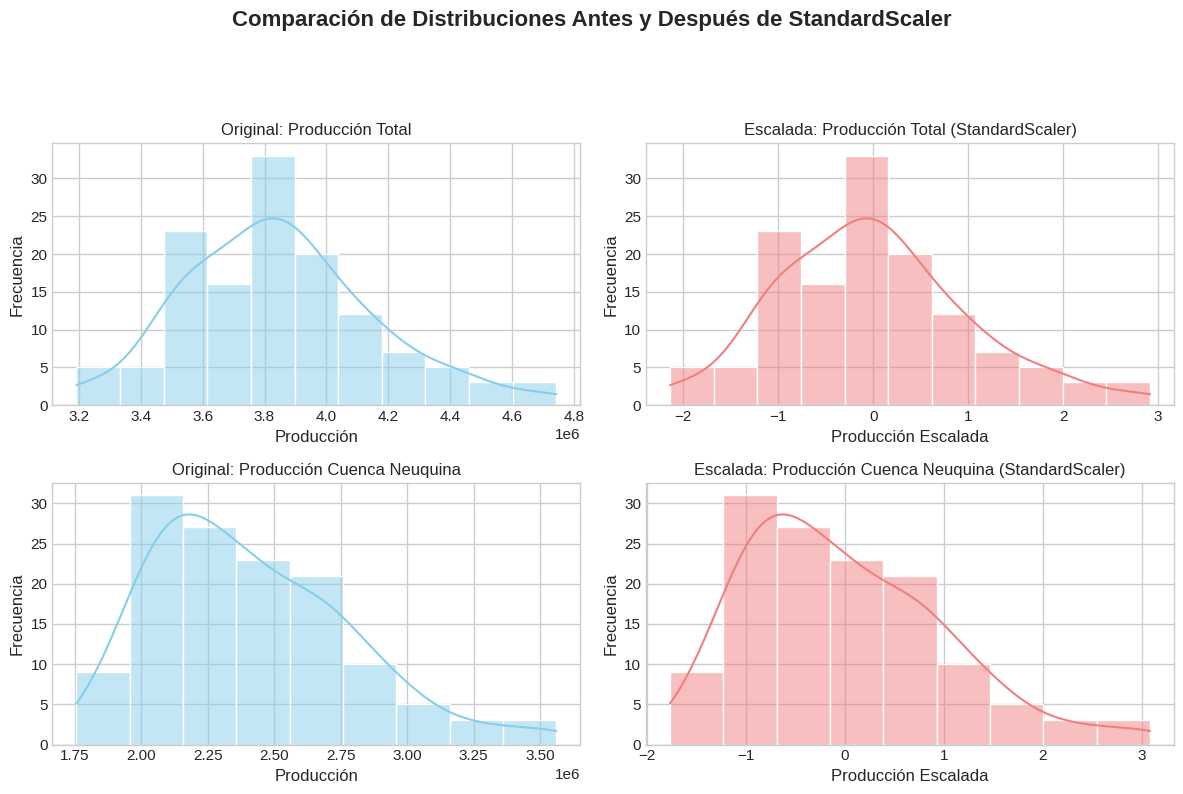

In [344]:
# Gr√°ficos comparativos antes y despues del StandarScaler
def aplicar_standard_scaler(df, columnas):

    dataset1_10_escalado = df.copy()
    scaler = StandardScaler()
    dataset1_10_escalado[columnas] = scaler.fit_transform(df[columnas])
    return dataset1_10_escalado

# Columnas a escalar
columnas_a_escalar = ['produccion_gas_natural_total', 'produccion_gas_natural_cuenca_neuquina']

# Aplicar StandardScaler
dataset1_10_escalado_standard = aplicar_standard_scaler(dataset1_10.copy(), columnas_a_escalar)

# Crear la figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Comparaci√≥n de Distribuciones Antes y Despu√©s de StandardScaler', fontsize=16, fontweight='bold', y=1.02)

# Histograma de 'produccion_gas_natural_total' original
sns.histplot(dataset1_10['produccion_gas_natural_total'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Original: Producci√≥n Total')
axes[0, 0].set_xlabel('Producci√≥n')
axes[0, 0].set_ylabel('Frecuencia')

# Histograma de 'produccion_gas_natural_total' escalada
sns.histplot(dataset1_10_escalado_standard['produccion_gas_natural_total'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Escalada: Producci√≥n Total (StandardScaler)')
axes[0, 1].set_xlabel('Producci√≥n Escalada')
axes[0, 1].set_ylabel('Frecuencia')

# Histograma de 'produccion_gas_natural_cuenca_neuquina' original
sns.histplot(dataset1_10['produccion_gas_natural_cuenca_neuquina'], kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Original: Producci√≥n Cuenca Neuquina')
axes[1, 0].set_xlabel('Producci√≥n')
axes[1, 0].set_ylabel('Frecuencia')

# Histograma de 'produccion_gas_natural_cuenca_neuquina' escalada
sns.histplot(dataset1_10_escalado_standard['produccion_gas_natural_cuenca_neuquina'], kde=True, ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Escalada: Producci√≥n Cuenca Neuquina (StandardScaler)')
axes[1, 1].set_xlabel('Producci√≥n Escalada')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [345]:
# MinMax Scaler para producci√≥n por cuenca, por tipo, convencional y no convencional

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def aplicar_minmax_scaler(df, columnas):

    dataset1_10_escalado = df.copy()
    scaler = MinMaxScaler()
    dataset1_10_escalado[columnas] = scaler.fit_transform(df[columnas])
    return dataset1_10_escalado

# Columnas a escalar con MinMaxScaler
columnas_a_escalar_minmax = [
    'produccion_gas_natural_cuenca_austral',
    'produccion_gas_natural_cuenca_gsj',
    'produccion_gas_natural_cuenca_noroeste',
    'produccion_gas_natural_cuenca_cuyana',
    'produccion_shale_gas',
    'produccion_tight_gas',
    'produccion_no_convencional',
    'produccion_convencional'
]

# Aplicar la funci√≥n de escalado MinMaxScaler
dataset1_10_escalado_minmax = aplicar_minmax_scaler(dataset1_10.copy(), columnas_a_escalar_minmax)

# Mostrar las primeras filas de las columnas originales y escaladas para comparar
print("Primeras filas de las columnas originales:")
print(dataset1_10[columnas_a_escalar_minmax].head())

print("\nPrimeras filas de las columnas escaladas con MinMaxScaler:")
print(dataset1_10_escalado_minmax[columnas_a_escalar_minmax].head())

# Puedes verificar los valores m√≠nimos y m√°ximos aproximados de las columnas escaladas
print("\nValores m√≠nimos de las columnas escaladas (MinMaxScaler):")
print(dataset1_10_escalado_minmax[columnas_a_escalar_minmax].min())

print("\nValores m√°ximos de las columnas escaladas (MinMaxScaler):")
print(dataset1_10_escalado_minmax[columnas_a_escalar_minmax].max())

Primeras filas de las columnas originales:
     produccion_gas_natural_cuenca_austral  produccion_gas_natural_cuenca_gsj  \
96                             885167.3714                        442014.6605   
97                             793800.6656                        403246.2098   
98                             879715.0346                        453502.3597   
99                             740749.0121                        438266.3703   
100                            880061.9141                        445484.1645   

     produccion_gas_natural_cuenca_noroeste  \
96                              263495.3680   
97                              233504.3885   
98                              254380.6826   
99                              239112.5697   
100                             247344.8389   

     produccion_gas_natural_cuenca_cuyana  produccion_shale_gas  \
96                              4599.6114          23465.959800   
97                              4352.7275          22

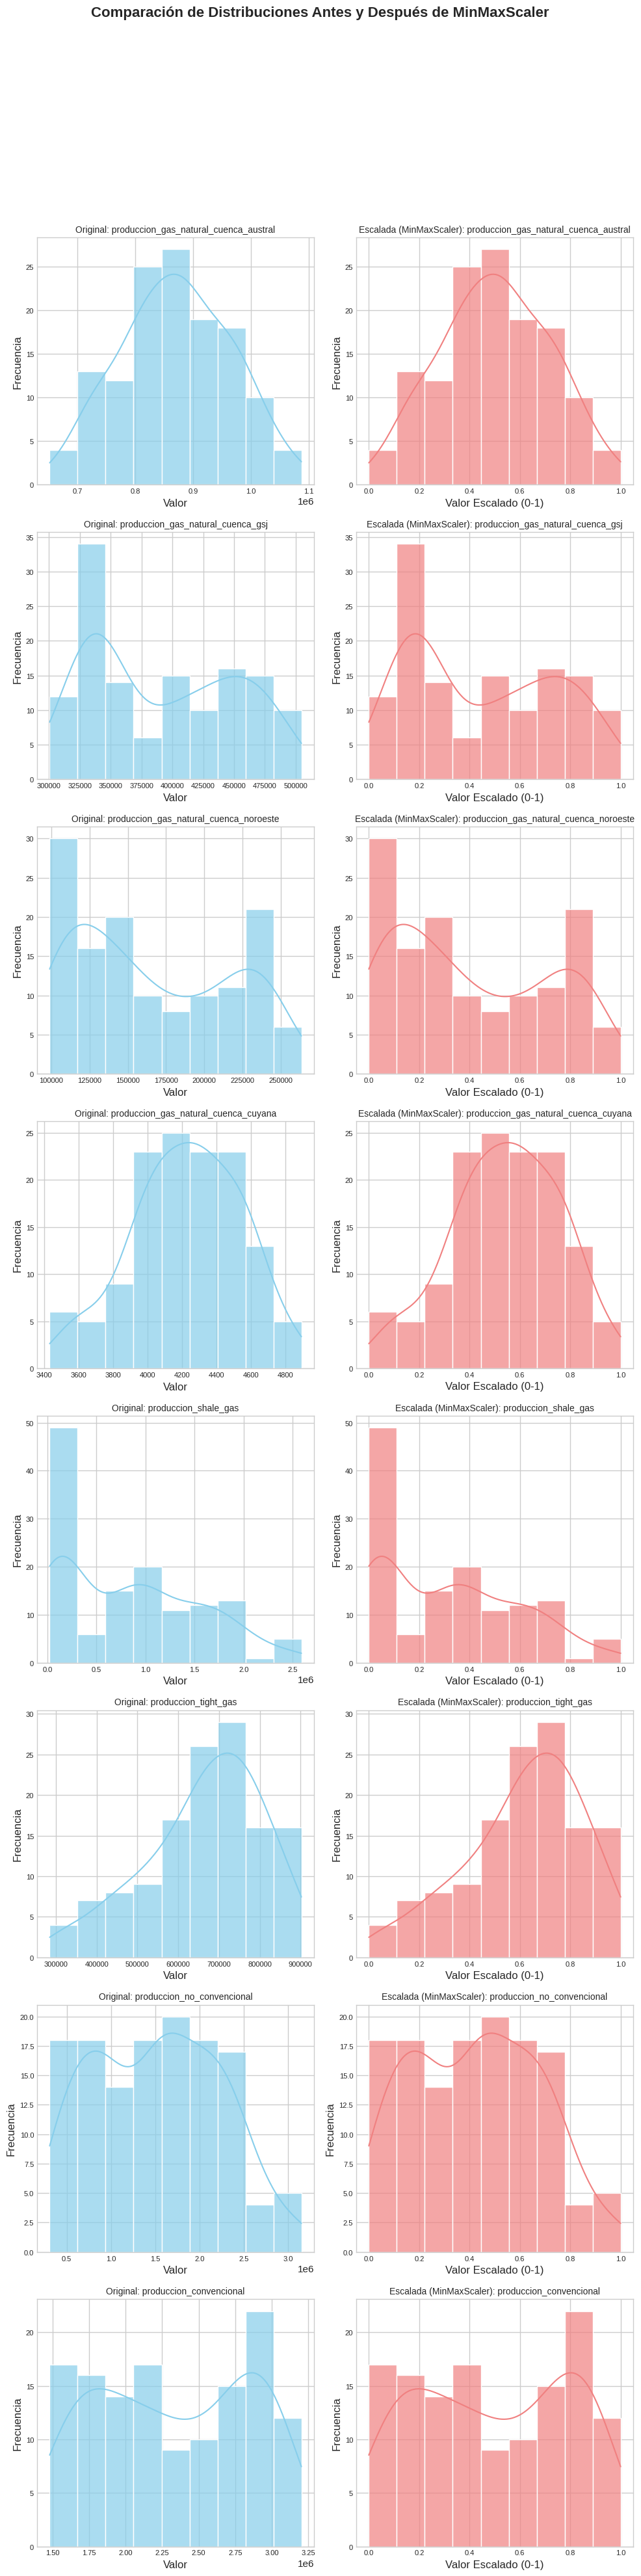

In [346]:
# Gr√°ficos comparativos antes y despues MinMaxScaler

# Crear la figura con subplots (una columna de 2 gr√°ficos por cada variable)
num_columnas = len(columnas_a_escalar_minmax)
fig, axes = plt.subplots(num_columnas, 2, figsize=(10, 5 * num_columnas))
fig.suptitle('Comparaci√≥n de Distribuciones Antes y Despu√©s de MinMaxScaler', fontsize=16, fontweight='bold', y=1.02)

for i, columna in enumerate(columnas_a_escalar_minmax):
    # Histograma de la columna original
    sns.histplot(dataset1_10[columna], kde=True, ax=axes[i, 0], color='skyblue', alpha=0.7)
    axes[i, 0].set_title(f'Original: {columna}', fontsize=10)
    axes[i, 0].set_xlabel('Valor')
    axes[i, 0].set_ylabel('Frecuencia')
    axes[i, 0].tick_params(axis='both', which='major', labelsize=8)

    # Histograma de la columna escalada
    sns.histplot(dataset1_10_escalado_minmax[columna], kde=True, ax=axes[i, 1], color='lightcoral', alpha=0.7)
    axes[i, 1].set_title(f'Escalada (MinMaxScaler): {columna}', fontsize=10)
    axes[i, 1].set_xlabel('Valor Escalado (0-1)')
    axes[i, 1].set_ylabel('Frecuencia')
    axes[i, 1].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Verificamos tipos de datos y guardamos dataset editado para pr√≥ximos trabajos

In [44]:
dataset1_10.columns

Index(['indice_tiempo', 'produccion_gas_natural_cuenca_austral',
       'produccion_gas_natural_cuenca_gsj',
       'produccion_gas_natural_cuenca_neuquina',
       'produccion_gas_natural_cuenca_noroeste',
       'produccion_gas_natural_cuenca_cuyana', 'produccion_gas_natural_total',
       'produccion_shale_gas', 'produccion_tight_gas', 'anio',
       'produccion_no_convencional', 'produccion_convencional', 'mes'],
      dtype='object')

In [45]:
dataset1_10.shape

(132, 13)

In [46]:
dataset1_10.dtypes

indice_tiempo                             datetime64[ns]
produccion_gas_natural_cuenca_austral            float64
produccion_gas_natural_cuenca_gsj                float64
produccion_gas_natural_cuenca_neuquina           float64
produccion_gas_natural_cuenca_noroeste           float64
produccion_gas_natural_cuenca_cuyana             float64
produccion_gas_natural_total                     float64
produccion_shale_gas                             float64
produccion_tight_gas                             float64
anio                                               int64
produccion_no_convencional                       float64
produccion_convencional                          float64
mes                                                int64
dtype: object

Previo a la exportaci√≥n del dataset1 editado se decide eliminar la feature 'indice_tiempo' ya que basaremos nuestros modelos predictivos en 'anio' y 'mes'

In [347]:
dataset1_10 = dataset1_10.drop(columns=['indice_tiempo'])
print(dataset1_10.columns)

Index(['produccion_gas_natural_cuenca_austral',
       'produccion_gas_natural_cuenca_gsj',
       'produccion_gas_natural_cuenca_neuquina',
       'produccion_gas_natural_cuenca_noroeste',
       'produccion_gas_natural_cuenca_cuyana', 'produccion_gas_natural_total',
       'produccion_shale_gas', 'produccion_tight_gas', 'anio',
       'produccion_no_convencional', 'produccion_convencional', 'mes'],
      dtype='object')


In [348]:
dataset1_10.to_csv('dataset1_editado.csv', index=False)

# **Carga e inspecci√≥n Dataset2**

In [487]:
#COMENZAMOS CON EL DATASET2
#Carga del archivo Dataset2
dataset2 = pd.read_csv('produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv')



In [488]:
#Inspecci√≥n B√°sica
dataset2.head()

idempresa  anio  mes  idpozo  prod_pet  prod_gas  prod_agua  iny_agua  \
0      YSUR  2018    1  132488       0.0   171.937       0.00       0.0   
1      YSUR  2017    1  130021       0.0   245.850      16.68       0.0   
2      YSUR  2018    1  132487       0.0   514.696      17.00       0.0   
3      YSUR  2015    1  137212       0.0   422.110       0.00       0.0   
4      YSUR  2018    1  132361       0.0   217.103       7.30       0.0   

   iny_gas  iny_co2  ...    cuenca  provincia  coordenadax coordenaday  \
0      0.0      0.0  ...  NEUQUINA  Rio Negro   -67.864960  -39.016722   
1      0.0      0.0  ...  NEUQUINA    Neuqu√©n   -69.733102  -39.024859   
2      0.0      0.0  ...  NEUQUINA  Rio Negro   -67.837875  -39.019313   
3      0.0      0.0  ...  NEUQUINA    Neuqu√©n   -69.255971  -38.860779   
4      0.0      0.0  ...  NEUQUINA    Neuqu√©n   -69.231360  -38.869270   

   tipo_de_recurso      proyecto clasificacion subclasificacion  \
0  NO CONVENCIONAL      GAS PLUS   EXPLOTACION       DESARROLLO   
1  NO CONVENCIONAL      GAS PLUS   EXPLOTACION       DESARROLLO   
2  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION       DESARROLLO   
3  NO CONVENCIONAL      GAS PLUS   EXPLOTACION       DESARROLLO   
4  NO CONVENCIONAL      GAS PLUS   EXPLOTACION       DESARROLLO   

  sub_tipo_recurso  fecha_data  
0            TIGHT  2018-01-31  
1            TIGHT  2017-01-31  
2            TIGHT  2018-01-31  
3            TIGHT  2015-01-31  
4            TIGHT  2018-01-31  

[5 rows x 40 columns]

In [489]:
#Inspecci√≥n B√°sica: Tama√±o de dataset2
dataset2.shape

(345382, 40)

In [490]:
#Inspecci√≥n B√°sica: Nombres columnas dataset2
dataset2.columns

Index(['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo',
       'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
       'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento',
       'areayacimiento', 'cuenca', 'provincia', 'coordenadax', 'coordenaday',
       'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion',
       'sub_tipo_recurso', 'fecha_data'],
      dtype='object')

In [491]:
#Inspecci√≥n B√°sica: Verificamos el tipo de dato
dataset2.dtypes

idempresa                  object
anio                        int64
mes                         int64
idpozo                      int64
prod_pet                  float64
prod_gas                  float64
prod_agua                 float64
iny_agua                  float64
iny_gas                   float64
iny_co2                   float64
iny_otro                  float64
tef                       float64
vida_util                 float64
tipoextraccion             object
tipoestado                 object
tipopozo                   object
observaciones              object
fechaingreso               object
rectificado                object
habilitado                 object
idusuario                   int64
empresa                    object
sigla                      object
formprod                   object
profundidad               float64
formacion                  object
idareapermisoconcesion     object
areapermisoconcesion       object
idareayacimiento           object
areayacimiento             object
cuenca                     object
provincia                  object
coordenadax               float64
coordenaday               float64
tipo_de_recurso            object
proyecto                   object
clasificacion              object
subclasificacion           object
sub_tipo_recurso           object
fecha_data                 object
dtype: object

In [492]:
#Inspecci√≥n B√°sica: An√°lisis de datos faltantes dataset 2
dataset2.isnull().sum()

idempresa                      0
anio                           0
mes                            0
idpozo                         0
prod_pet                       0
prod_gas                       0
prod_agua                      0
iny_agua                       0
iny_gas                        0
iny_co2                        0
iny_otro                       0
tef                            0
vida_util                 338203
tipoextraccion               584
tipoestado                   584
tipopozo                     584
observaciones             326691
fechaingreso                   0
rectificado                    0
habilitado                     0
idusuario                      0
empresa                        0
sigla                          0
formprod                       0
profundidad                    0
formacion                      0
idareapermisoconcesion         0
areapermisoconcesion           0
idareayacimiento               0
areayacimiento                 0
cuenca                         0
provincia                      0
coordenadax                    0
coordenaday                    0
tipo_de_recurso                0
proyecto                       0
clasificacion                858
subclasificacion             858
sub_tipo_recurso             388
fecha_data                     0
dtype: int64

En esta primer fase de inspecci√≥n inicial, nuestro enfoque principal consisti√≥ en determinar la cantidad de valores nulos presentes en cada columna, as√≠ como identificar los tipos de datos que conten√≠a cada una. Este acercamiento nos brind√≥ una visi√≥n general de la calidad y la estructura del dataset, informaci√≥n fundamental que guiar√° las etapas posteriores de *tratamiento y transformaci√≥n de los datos*, donde se tomar√°n decisiones espec√≠ficas para abordar los hallazgos iniciales.

**An√°lisis y Tratamiento de las Fechas**

El dataset 2 presenta diversas columnas relacionadas con fechas, incluyendo 'fechaingreso', 'fecha_data', 'mes' y 'anio', todas ellas susceptibles de ser convertidas al formato datetime.

**DECISI√ìN:** Sin embargo, para enfocar nuestro an√°lisis en la dimensi√≥n temporal de manera agregada, hemos decidido conservar √∫nicamente las columnas 'mes' y 'anio'. A partir de estas dos columnas, crearemos una nueva columna denominada 'fecha' que contendr√° la combinaci√≥n del mes y el a√±o en formato datetime. Las columnas originales 'fechaingreso' y 'fecha_data' ser√°n eliminadas, ya que la granularidad diaria que proporcionan no es relevante para los objetivos de nuestro an√°lisis actual, centrado en patrones temporales a nivel mensual y anual.

In [493]:
#Analisis y Tratamiento de fechas

# Crear la nueva columna 'indice_tiempo' combinando 'anio' y 'mes'
dataset2['indice_tiempo'] = pd.to_datetime({'year': dataset2['anio'],
                                     'month': dataset2['mes'],
                                     'day': 1})
# Eliminar las columnas originales que no vamos a usar
columnas_a_eliminar = ['fechaingreso', 'fecha_data']
dataset2_10 = dataset2.drop(columns=columnas_a_eliminar, errors='ignore').copy()

# Mostrar sus tipos de datos para verificar
print("\nTipos de datos de dataset2_10:")
print(dataset2_10.dtypes)



Tipos de datos de dataset2_10:
idempresa                         object
anio                               int64
mes                                int64
idpozo                             int64
prod_pet                         float64
prod_gas                         float64
prod_agua                        float64
iny_agua                         float64
iny_gas                          float64
iny_co2                          float64
iny_otro                         float64
tef                              float64
vida_util                        float64
tipoextraccion                    object
tipoestado                        object
tipopozo                          object
observaciones                     object
rectificado                       object
habilitado                        object
idusuario                          int64
empresa                           object
sigla                             object
formprod                          object
profundidad              

In [494]:
# Ordenar por fecha
dataset2 = dataset2.sort_values('indice_tiempo')

In [495]:
# Filtrar por rango de a√±os (2006 a 2024)

dataset2_filtrado = dataset2[(dataset2['indice_tiempo'].dt.year >= 2006) &
                             (dataset2['indice_tiempo'].dt.year <= 2024)]

Al igual que en el Dataset1 se decide limitar el analisis hasta el a√±o 2024, para as√≠ contar con los datos anuales completos y no contemplar el a√±o en curso.

**Comparaci√≥n de la serie completa vs. √∫ltimos 10 a√±os**

A continuaci√≥n, realizamos una comparaci√≥n entre la serie hist√≥rica completa y los √∫ltimos 10 a√±os de datos de producci√≥n de gas natural (Dataset 1). El objetivo es analizar si la informaci√≥n m√°s reciente mantiene un comportamiento similar al hist√≥rico o si presenta tendencias distintas que justifiquen entrenar un modelo predictivo utilizando √∫nicamente ese per√≠odo m√°s reciente, al igual que como lo realizamos en el an√°lisis del Dataset1

In [496]:
#Filtrar √∫ltimos 10 a√±os
dataset2_10 = dataset2_filtrado[dataset2_filtrado['indice_tiempo'] >= '2014-01-01']


In [497]:
from scipy.stats import linregress
import pandas as pd


# 1) Estad√≠sticas descriptivas
estadisticos_dataset2 = {
    'Estad√≠stico': ['Per√≠odo', 'Promedio', 'Desviaci√≥n est√°ndar', 'M√≠nimo', 'M√°ximo'],
    'Serie completa': [
        f"{dataset2_filtrado['indice_tiempo'].iloc[0].strftime('%Y-%m')} a {dataset2_filtrado['indice_tiempo'].iloc[-1].strftime('%Y-%m')}",
        round(dataset2_filtrado['prod_gas'].mean(), 0),
        round(dataset2_filtrado['prod_gas'].std(), 0),
        round(dataset2_filtrado['prod_gas'].min(), 0),
        round(dataset2_filtrado['prod_gas'].max(), 0)
    ],
    '√öltimos 10 a√±os': [
        f"{dataset2_10['indice_tiempo'].iloc[0].strftime('%Y-%m')} a {dataset2_10['indice_tiempo'].iloc[-1].strftime('%Y-%m')}",
        round(dataset2_10['prod_gas'].mean(), 0),
        round(dataset2_10['prod_gas'].std(), 0),
        round(dataset2_10['prod_gas'].min(), 0),
        round(dataset2_10['prod_gas'].max(), 0)
    ]
}
# Creamos y mostramos la tabla
tabla_estadisticos_dataset2 = pd.DataFrame(estadisticos_dataset2)
print("Estad√≠sticas Descriptivas (Dataset 2):")
print(tabla_estadisticos_dataset2.to_string(index=False))



Estad√≠sticas Descriptivas (Dataset 2):
        Estad√≠stico    Serie completa   √öltimos 10 a√±os
            Per√≠odo 2006-01 a 2024-12 2014-01 a 2024-12
           Promedio             635.0             645.0
Desviaci√≥n est√°ndar            1600.0            1636.0
             M√≠nimo             -12.0             -12.0
             M√°ximo           29130.0           29130.0


Al enfocar la mirada en los √∫ltimos 10 a√±os, desde enero de 2014 hasta diciembre de 2024, se observa una ligera variaci√≥n en las estad√≠sticas. El promedio de producci√≥n se incrementa ligeramente a 645 unidades, y la desviaci√≥n est√°ndar tambi√©n experimenta un leve aumento, situ√°ndose en 1636 unidades, lo que sugiere una variabilidad similar al per√≠odo completo. En general, la producci√≥n de gas muestra una tendencia a mantenerse en niveles promedio similares en ambos per√≠odos analizados, aunque con una alta dispersi√≥n de los datos.

Tambien se observo que en ambos casos al analizar el feature de produccion de gas, es llamativo que el minimo sea un valor negativo. Tendremos en cuenta este datos para analizarlo en la *Tansformaci√≥n de Datos del Dataset2* y corregirlo en caso de ser un error.

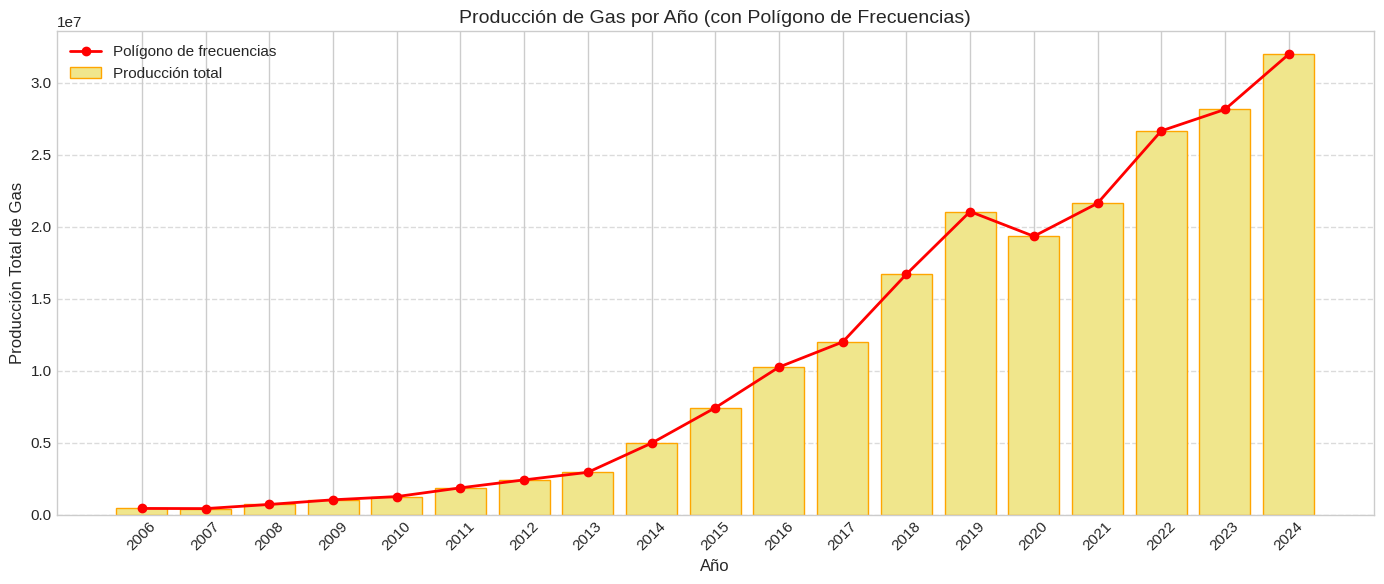

In [498]:
#Gr√°fico de Barras- Producci√≥n de Gas por A√±o (con Pol√≠gono de Frecuencias)

# Agrupar por a√±o y calcular producci√≥n total
produccion_por_a√±o = dataset2_filtrado.groupby('anio')['prod_gas'].sum()

#Indice tipo int
a√±os = produccion_por_a√±o.index.astype(int)
produccion = produccion_por_a√±o.values

plt.figure(figsize=(14, 6))

# Barras
plt.bar(a√±os, produccion, color='khaki', edgecolor='orange', label='Producci√≥n total')

# L√≠nea
plt.plot(a√±os, produccion, color='red', marker='o', linestyle='-', linewidth=2, label='Pol√≠gono de frecuencias')

# Eje X con a√±os enteros
plt.xticks(a√±os, rotation=45)

# Etiquetas y estilo
plt.title('Producci√≥n de Gas por A√±o (con Pol√≠gono de Frecuencias)', fontsize=14)
plt.xlabel('A√±o')
plt.ylabel('Producci√≥n Total de Gas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

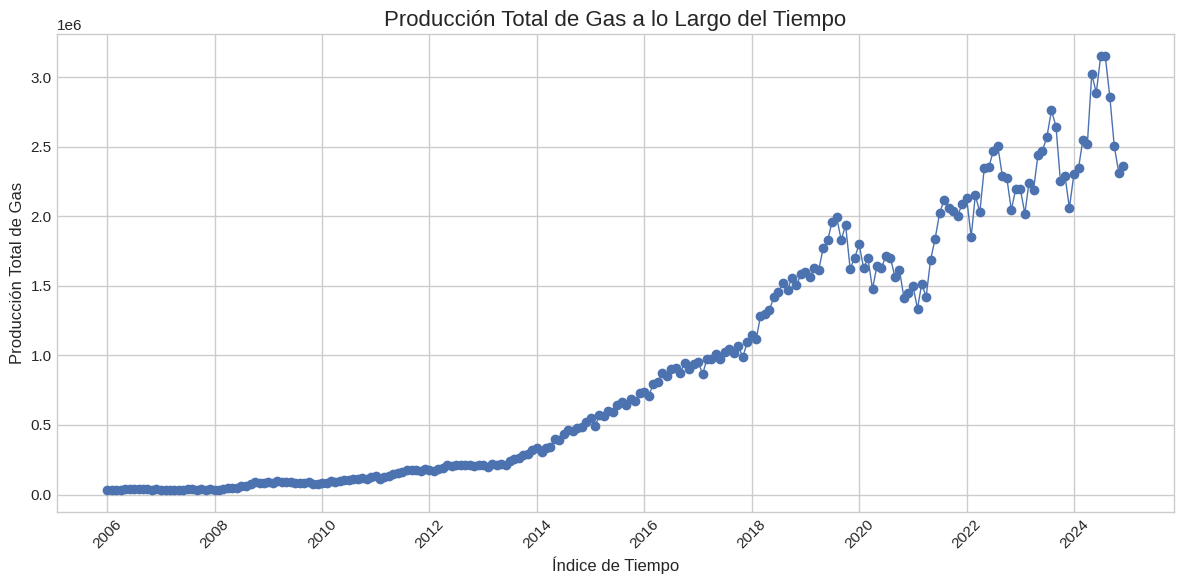

In [499]:
# An√°lisis de Tendencias Temporales: Producci√≥n Total a lo Largo del Tiempo

# Paso 1: Agrupar los datos por indice_tiempo y sumar la producci√≥n de gas
produccion_gas_por_fecha = dataset2_filtrado.groupby('indice_tiempo')['prod_gas'].sum().reset_index()

# Paso 2: Crear el gr√°fico de l√≠neas
plt.figure(figsize=(12, 6))  # Define el tama√±o de la figura
plt.plot(produccion_gas_por_fecha['indice_tiempo'], produccion_gas_por_fecha['prod_gas'], marker='o', linestyle='-', linewidth=1)

# Paso 3: A√±adir t√≠tulos y etiquetas
plt.title('Producci√≥n Total de Gas a lo Largo del Tiempo', fontsize=16)
plt.xlabel('√çndice de Tiempo', fontsize=12)
plt.ylabel('Producci√≥n Total de Gas', fontsize=12)
plt.grid(True)

# Paso4: Formatear el eje x para una mejor visualizaci√≥n de las fechas
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta los m√°rgenes para evitar que las etiquetas se superpongan

# Paso 5: Mostrar el gr√°fico
plt.show()

Los gr√°ficos anteriores (*Producci√≥n Total de Gas a lo Largo del Tiempo y Producci√≥n de Gas por A√±o (con Pol√≠gono de Frecuencias) )* sugiere un punto de inflexi√≥n significativo alrededor de 2014 con un fuerte aumento en la producci√≥n de gas, especialmente impulsado a partir de 2017. Posteriormente, la producci√≥n se mantiene en niveles elevados con cierta variabilidad interanual.

Este fen√≥meno se vincula con varios factores:

- Desarrollo de Vaca Muerta: explotaci√≥n a gran escala de recursos no convencionales.

- Ley 27.007 (2014): modific√≥ el r√©gimen legal de hidrocarburos, generando incentivos para inversiones.

- Aumento de perforaciones y tecnolog√≠as no convencionales (shale y tight).

- Subsidios estatales a la oferta (como el Plan Gas).

- Transici√≥n energ√©tica: el gas natural gana protagonismo frente a otros combustibles.

Este contexto favoreci√≥ particularmente a la Cuenca Neuquina, principal receptora de inversiones, consolid√°ndola como la regi√≥n de mayor crecimiento.

Bibliograf√≠a: [El Gas No Convencional de Vaca Muerta como recurso estrat√©gico para la Argentina: evoluci√≥n y tendencias1](https://https://ri.conicet.gov.ar/bitstream/handle/11336/205308/CONICET_Digital_Nro.8c016886-f766-4f67-8851-b367becd8e74_B.pdf?sequence=2&isAllowed=y)

# **Visualizaci√≥n Dataset2**

**Producci√≥n de Gas No Convencional**

<Axes: xlabel='prod_gas', ylabel='Count'>

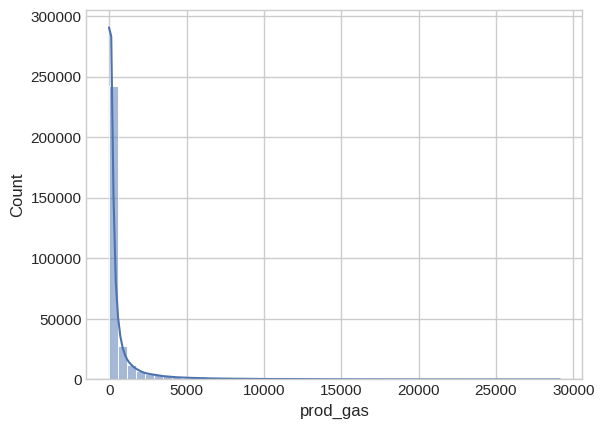

In [500]:
#Histograma- Producci√≥n de Gas Dataset2

sns.histplot(dataset2_10['prod_gas'], bins=50, kde=True)

**Producci√≥n de Gas vs. Profundidad de Pozo**

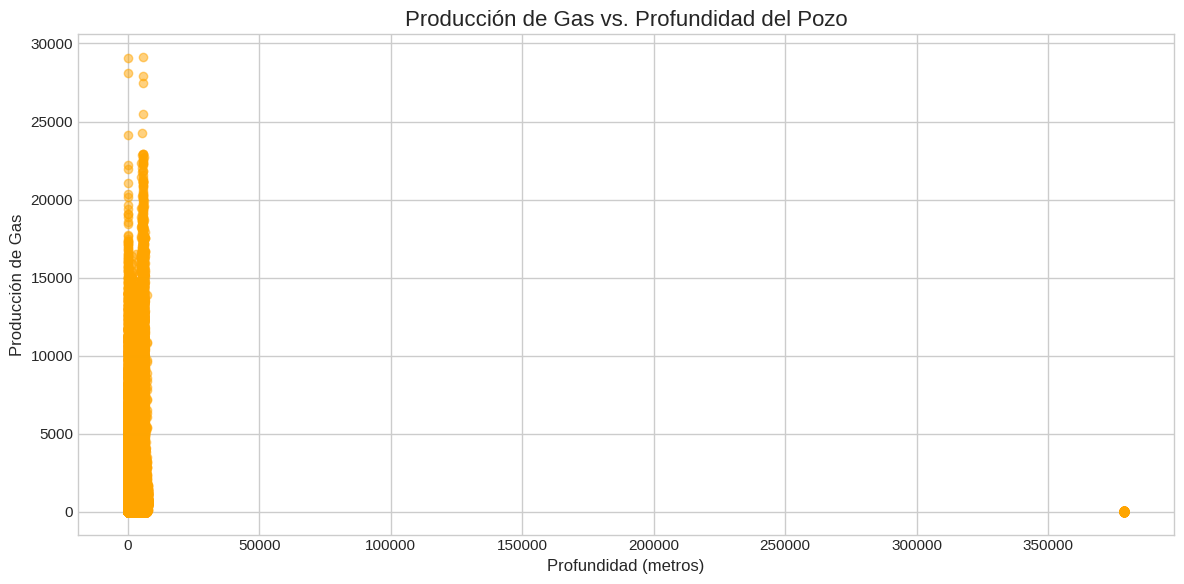

In [501]:
#Producci√≥n de Gas vs. Profundidad

if 'profundidad' in dataset2_10.columns and 'prod_gas' in dataset2_10.columns:
    plt.figure(figsize=(12, 6))
    plt.scatter(dataset2_10['profundidad'], dataset2_10['prod_gas'], alpha=0.5, color='orange')
    plt.title('Producci√≥n de Gas vs. Profundidad del Pozo', fontsize=16)
    plt.xlabel('Profundidad (metros)', fontsize=12)
    plt.ylabel('Producci√≥n de Gas', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Las columnas 'profundidad' o 'prod_gas' no est√°n disponibles en el DataFrame.")

La mayor√≠a de los pozos analizados se encuentran a profundidades relativamente bajas (menores a 5000 metros), y dentro de este rango, la producci√≥n de gas es muy variable. Existe un n√∫mero muy peque√±o de pozos que alcanzan profundidades mucho mayores, y estos pozos at√≠picamente profundos tienden a tener una producci√≥n de gas baja.

**Producci√≥n por Cuenca a lo Largo del Tiempo**

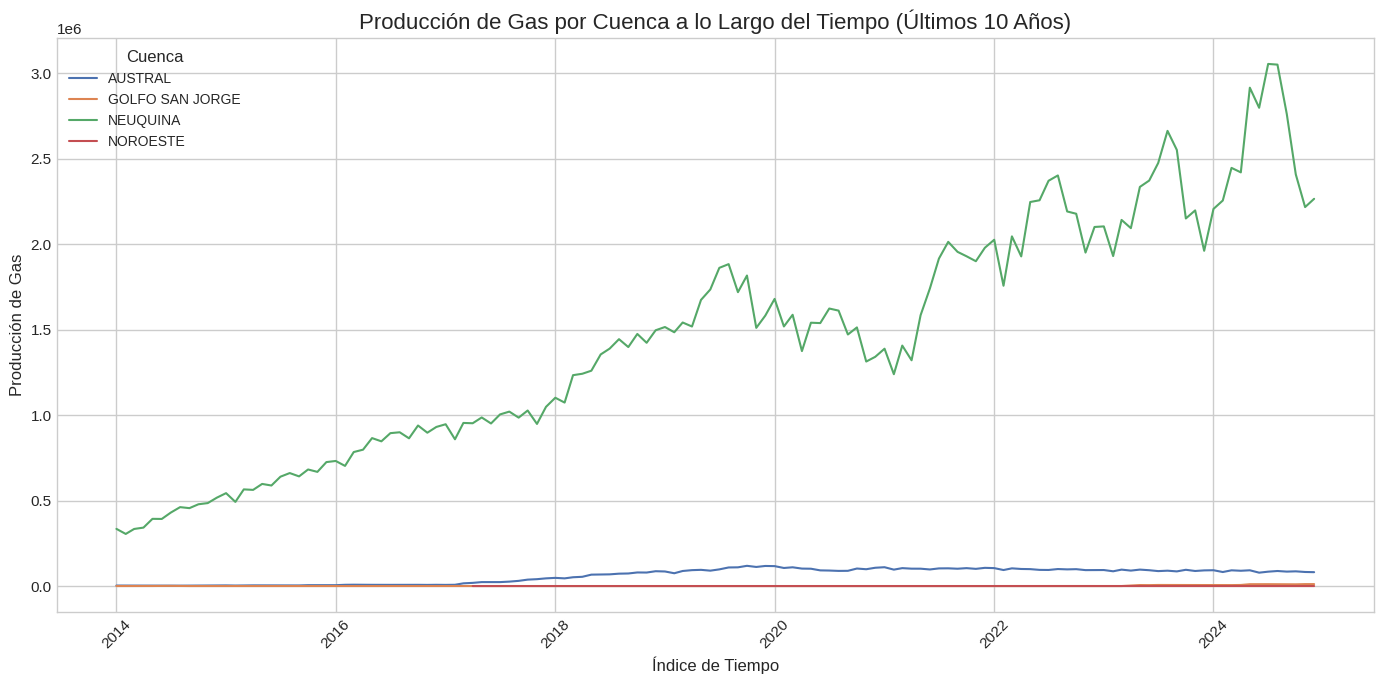

In [502]:
# An√°lisis de Tendencias Temporales: Producci√≥n por Cuenca a lo Largo del Tiempo

# Paso 1: Agrupar los datos por Cuenca e indice_tiempo, y sumar la producci√≥n de gas.
produccion_gas_por_cuenca_fecha = dataset2_10.groupby(['cuenca', 'indice_tiempo'])['prod_gas'].sum().reset_index()

# Paso 2: Obtener la lista √∫nica de cuencas para iterar sobre ellas.
cuencas_unicas = produccion_gas_por_cuenca_fecha['cuenca'].unique()

# Paso 3: Crear la figura y los ejes para el gr√°fico.
plt.figure(figsize=(14, 7))
plt.grid(True)

# Paso 4: Iterar sobre cada cuenca y graficar su producci√≥n a lo largo del tiempo.
for cuenca in cuencas_unicas:
    data_cuenca = produccion_gas_por_cuenca_fecha[produccion_gas_por_cuenca_fecha['cuenca'] == cuenca]
    plt.plot(data_cuenca['indice_tiempo'], data_cuenca['prod_gas'], label=cuenca, linewidth=1.5)

# Paso 5: A√±adir t√≠tulos, etiquetas y leyenda.
plt.title('Producci√≥n de Gas por Cuenca a lo Largo del Tiempo (√öltimos 10 A√±os)', fontsize=16)
plt.xlabel('√çndice de Tiempo', fontsize=12)
plt.ylabel('Producci√≥n de Gas', fontsize=12)
plt.legend(title='Cuenca', fontsize=10)

# Paso 6: Formatear el eje x para una mejor visualizaci√≥n de las fechas.
plt.xticks(rotation=45)
plt.tight_layout()

# Paso 7: Mostrar el gr√°fico.
plt.show()

La Cuenca Neuquina se destaca como la dominante en la producci√≥n de gas, experimentando un crecimiento exponencial a partir de 2014. Las otras tres cuencas (Austral, Golfo San Jorge y Noroeste) mantienen niveles de producci√≥n de gas significativamente m√°s bajos y relativamente estables a lo largo del per√≠odo analizado. El aumento masivo en la producci√≥n total de gas que vimos en el gr√°fico anterior se debe principalmente al crecimiento en la Cuenca Neuquina.

Este gr√°fico resalta la disparidad en la producci√≥n de gas entre las diferentes cuencas, con la Cuenca Neuquina emergiendo como la fuerza impulsora del aumento en la producci√≥n total.

**Producci√≥n de Gas No Convencional por Subtipo de Recurso**


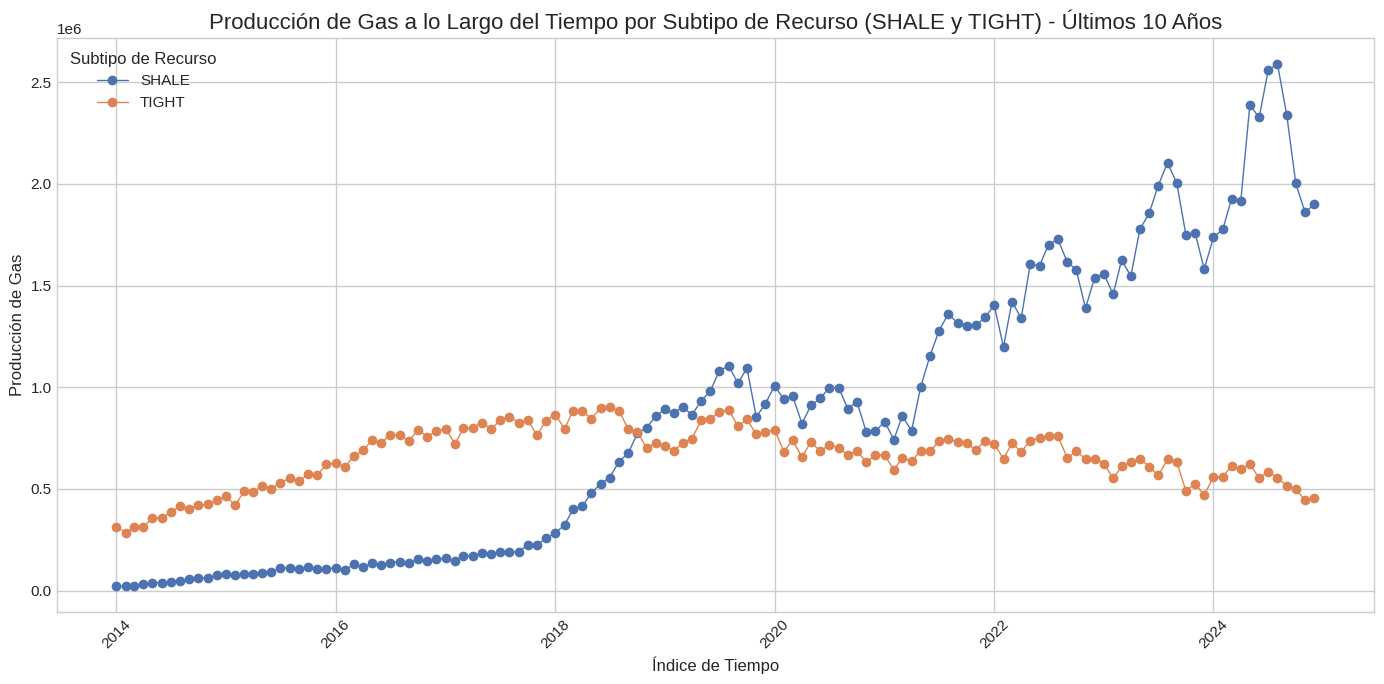

In [503]:
# An√°lisis de Datos Categ√≥ricos: Producci√≥n por Subtipo de Recurso

# Paso 1: Filtrar el DataFrame para incluir solo los subtipos 'SHALE' y 'TIGHT'.
df_shale_tight = dataset2_10[dataset2_10['sub_tipo_recurso'].isin(['SHALE', 'TIGHT'])].copy()

# Paso 2: Convertir la columna 'indice_tiempo' a datetime si a√∫n no lo est√°.
if not pd.api.types.is_datetime64_any_dtype(df_shale_tight['indice_tiempo']):
    df_shale_tight['indice_tiempo'] = pd.to_datetime(df_shale_tight['indice_tiempo'])

# Paso 3: Agrupar por indice_tiempo y subtipo de recurso, y sumar la producci√≥n de gas.
produccion_tiempo_subtipo = df_shale_tight.groupby(['indice_tiempo', 'sub_tipo_recurso'])['prod_gas'].sum().reset_index()

# Paso 4: Pivotear la tabla para tener 'SHALE' y 'TIGHT' como columnas.
produccion_pivot = produccion_tiempo_subtipo.pivot(index='indice_tiempo', columns='sub_tipo_recurso', values='prod_gas').fillna(0)

# Paso 6: Crear el gr√°fico de l√≠neas.
plt.figure(figsize=(14, 7))
plt.plot(produccion_pivot.index, produccion_pivot['SHALE'], label='SHALE', marker='o', linestyle='-', linewidth=1)
plt.plot(produccion_pivot.index, produccion_pivot['TIGHT'], label='TIGHT', marker='o', linestyle='-', linewidth=1)

# Paso 5: A√±adir t√≠tulo y etiquetas.
plt.title('Producci√≥n de Gas a lo Largo del Tiempo por Subtipo de Recurso (SHALE y TIGHT) - √öltimos 10 A√±os', fontsize=16)
plt.xlabel('√çndice de Tiempo', fontsize=12)
plt.ylabel('Producci√≥n de Gas', fontsize=12)
plt.legend(title='Subtipo de Recurso')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Paso 6: Mostrar el gr√°fico.
plt.show()

**Cantidad de Pozos de Gas No Convencional por Subtipo de Recurso**

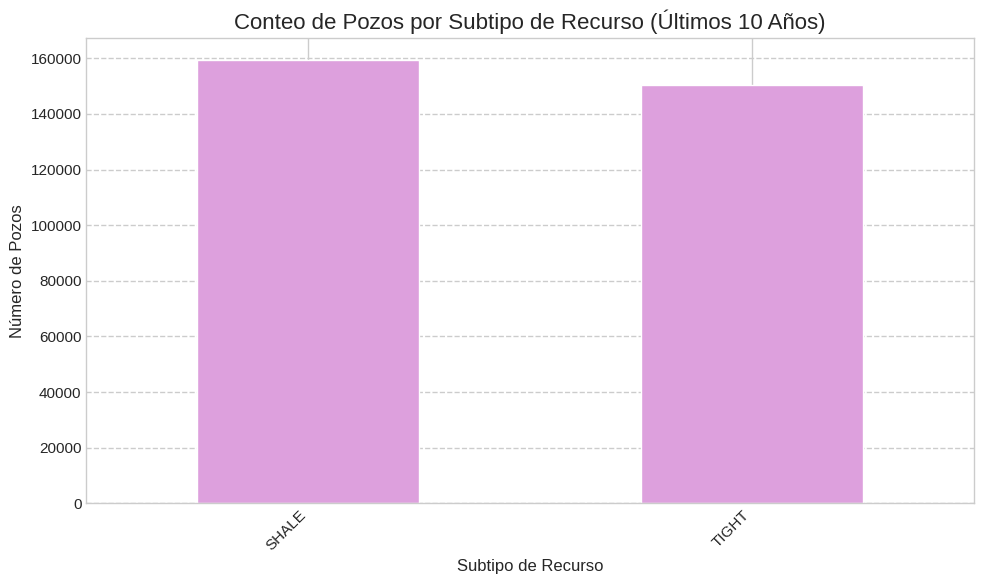

In [504]:
# An√°lisis de Datos Categ√≥ricos: Conteo de Pozos por Subtipo de Recurso

# Paso 1: Asegurarse de que la columna 'sub_tipo_recurso' exista en el DataFrame dataset2_10.
if 'sub_tipo_recurso' not in dataset2_10.columns:
    print("La columna 'sub_tipo_recurso' no se encuentra en dataset2_10.")
    exit()

# Paso 2: Contar la frecuencia de cada subtipo de recurso.
conteo_subtipo = dataset2_10['sub_tipo_recurso'].value_counts()

# Paso 3: Crear el gr√°fico de barras.
plt.figure(figsize=(10, 6))
conteo_subtipo.plot(kind='bar', color='plum')

# Paso 4: A√±adir t√≠tulo y etiquetas.
plt.title('Conteo de Pozos por Subtipo de Recurso (√öltimos 10 A√±os)', fontsize=16)
plt.xlabel('Subtipo de Recurso', fontsize=12)
plt.ylabel('N√∫mero de Pozos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Paso 5: Ajustar el layout para evitar que las etiquetas se superpongan.
plt.tight_layout()

# Paso 6: Mostrar el gr√°fico.
plt.show()

El an√°lisis de los √∫ltimos 10 a√±os de producci√≥n de gas, muestra la producci√≥n a lo largo del tiempo para ambos subtipos(SHALE y TIGHT), permitiendo observar tendencias y posibles correlaciones o divergencias en su comportamiento productivo.

Por otro lado, el gr√°fico de barras del conteo de pozos por subtipo de recurso ofrece una visi√≥n que indica la paridad en cuanto a la cantidad de pozos dedicados a la extracci√≥n de gas de formaciones SHALE y TIGHT.

Sin embargo A pesar de existir una cantidad similar de pozos operativos para la extracci√≥n de gas de formaciones SHALE y TIGHT en los √∫ltimos 10 a√±os, la producci√≥n proveniente de los pozos SHALE ha sido considerablemente mayor. Esto implica una **mayor productividad promedio por pozo para el subtipo SHALE** en comparaci√≥n con el TIGHT. Esta disparidad en la producci√≥n, a pesar de una inversi√≥n similar en la cantidad de pozos, subraya la importancia de considerar el tipo de recurso al evaluar la eficiencia y el potencial productivo. Para futuras estrategias y predicciones, es crucial tener en cuenta esta diferencia en la productividad inherente entre los pozos SHALE y TIGHT.

**Outliers - Producci√≥n de Gas y Profundidad**

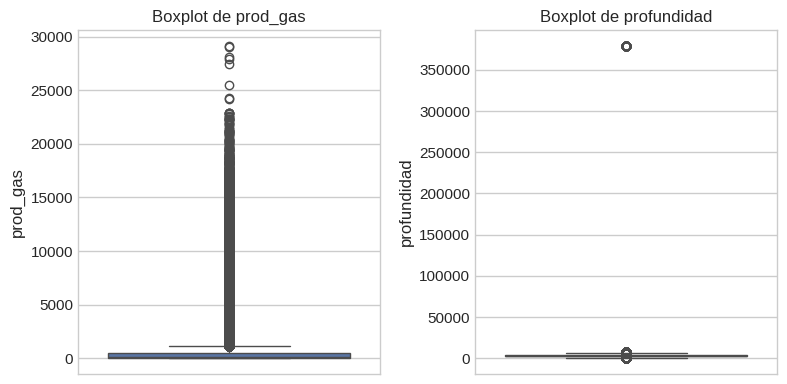

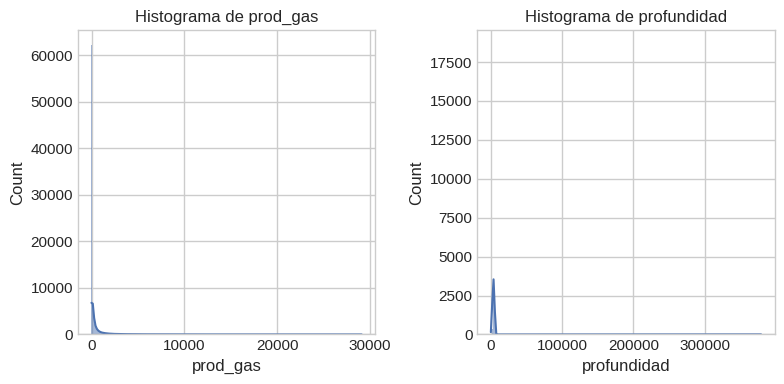

            prod_gas    profundidad
count  310183.000000  310183.000000
mean      644.811274    3678.058666
std      1635.936657    6958.068223
min       -12.267000       0.000000
25%        10.633258    2850.000000
50%       110.610000    3214.000000
75%       471.854050    4360.000000
max     29129.660000  378939.000000

Outliers en la columna 'prod_gas':
        prod_gas
260560   5939.99
338902   1337.12
260562   6952.57
338904   2312.54
260578   1846.64
N√∫mero de outliers: 40360

Outliers en la columna 'profundidad':
       profundidad
17596        350.0
39771        350.0
41660        350.0
58744        350.0
81527        350.0
N√∫mero de outliers: 5820


In [505]:
variables_a_explorar = ['prod_gas', 'profundidad']

# 1. Exploraci√≥n de Outliers:

# Boxplots
plt.figure(figsize=(12, 4))
for i, variable in enumerate(variables_a_explorar):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=dataset2_10[variable])
    plt.title(f'Boxplot de {variable}')
plt.tight_layout()
plt.show()

# Histogramas
plt.figure(figsize=(12, 4))
for i, variable in enumerate(variables_a_explorar):
    plt.subplot(1, 3, i + 1)
    sns.histplot(dataset2_10[variable], kde=True)
    plt.title(f'Histograma de {variable}')
plt.tight_layout()
plt.show()

# Estad√≠sticas Descriptivas
print(dataset2_10[variables_a_explorar].describe())

# Identificaci√≥n de outliers usando IQR
def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers

for variable in variables_a_explorar:
    outliers_variable = detectar_outliers_iqr(dataset2_10, variable)
    print(f"\nOutliers en la columna '{variable}':")
    print(outliers_variable[[variable]].head())
    print(f"N√∫mero de outliers: {len(outliers_variable)}")


En resumen, los boxplots revelan distribuciones no normales con sesgo positivo y la presencia de outliers significativos en 'prod_gas' y 'profundidad'.

# **Transformaci√≥n de Datos del Dataset2**

In [506]:
#Columnas con datos faltantes dataset2
dataset2_10.isnull().sum().loc[lambda x: x > 0]

vida_util           304758
tipoextraccion         236
tipoestado             236
tipopozo               236
observaciones       293877
clasificacion          528
subclasificacion       528
sub_tipo_recurso       338
dtype: int64

**Valores Nulos**

Se identificaron variables con:

**a. Altos valores nulos (m√°s del 90%)**

- vida_util
- observaciones

DECISI√ìN: Descartamos las features de 'vida_util' y 'observaciones' y por su baja utilidad y gran cantidad de nulos.


In [507]:
# Eliminar 'vida_util' y 'observaciones'

columnas_a_eliminar = ['vida_util', 'observaciones']

# Verificar si las columnas existen antes de intentar eliminarlas
for col in columnas_a_eliminar:
    if col in dataset2_10.columns:
        print(f"La columna '{col}' ser√° eliminada.")
    else:
        print(f"La columna '{col}' no se encontr√≥ en el DataFrame.")

# Crear un nuevo DataFrame sin las columnas especificadas
dataset2_10 = dataset2_10.drop(columns=columnas_a_eliminar, errors='ignore')

# Mostrar las primeras filas del DataFrame resultante para verificar
print("\nDataFrame dataset2_10 actualizado sin 'vida_util' y 'observaciones'.")
print(dataset2_10.head(2))

# Volver a imprimir las columnas para confirmar la eliminaci√≥n
print("\nColumnas restantes en dataset2_10:")
print(dataset2_10.columns)

La columna 'vida_util' ser√° eliminada.
La columna 'observaciones' ser√° eliminada.

DataFrame dataset2_10 actualizado sin 'vida_util' y 'observaciones'.
       idempresa  anio  mes  idpozo  prod_pet  prod_gas  prod_agua  iny_agua  \
17712        YPF  2014    1  145547       0.0    644.96       34.7       0.0   
338900      APEA  2014    1  132877       0.0      0.00        0.0       0.0   

        iny_gas  iny_co2  ...  provincia  coordenadax coordenaday  \
17712       0.0      0.0  ...    Neuqu√©n   -68.884200  -38.746600   
338900      0.0      0.0  ...  Rio Negro   -67.823092  -39.023537   

        tipo_de_recurso      proyecto clasificacion subclasificacion  \
17712   NO CONVENCIONAL      GAS PLUS   EXPLOTACION       DESARROLLO   
338900  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION       DESARROLLO   

       sub_tipo_recurso  fecha_data indice_tiempo  
17712             TIGHT  2014-01-31    2014-01-01  
338900            TIGHT  2014-01-31    2014-01-01  

[2 rows x 39 columns]


**b. Valores nulos moderados (500‚Äì1,000)**
- clasificacion
- subclasificacion
- tipoextraccion
- tipopozo
- tipoestado
- sub_tipo_recurso


In [508]:
#Valores Nulos- Clasificaci√≥n
columna_clasificacion = 'clasificacion'

# Obtener todos los valores √∫nicos de la columna 'clasificacion'
valores_unicos = dataset2[columna_clasificacion].unique()

# Imprimir los valores √∫nicos
print(f"Valores √∫nicos en la columna '{columna_clasificacion}':")
for valor in valores_unicos:
    print(valor)

Valores √∫nicos en la columna 'clasificacion':
EXPLOTACION
EXPLORACION
nan
SERVICIO


In [509]:
#Valores Nulos- Subclasificaci√≥n
columna_subclasificacion = 'subclasificacion'

# Obtener todos los valores √∫nicos de la columna 'subclasificacion'
valores_unicos = dataset2[columna_subclasificacion].unique()

# Imprimir los valores √∫nicos
print(f"Valores √∫nicos en la columna '{columna_subclasificacion}':")
for valor in valores_unicos:
    print(valor)

Valores √∫nicos en la columna 'subclasificacion':
DESARROLLO
EXPLORACION
EXPLORATORIO PROFUNDO
EXTENSION
AVANZADA
nan
ESTUDIO
CONTROL
SUMIDERO


In [510]:
#Valores Nulos- Tipoextraccion
columna_tipoextraccion = 'tipoextraccion'

# Obtener todos los valores √∫nicos de la columna 'tipoextraccion'
valores_unicos = dataset2[columna_tipoextraccion].unique()

# Imprimir los valores √∫nicos
print(f"Valores √∫nicos en la columna '{columna_tipoextraccion}':")
for valor in valores_unicos:
    print(valor)

Valores √∫nicos en la columna 'tipoextraccion':
Sin Sistema de Extracci√≥n
Bombeo Hidr√°ulico
Bombeo Mec√°nico
Surgencia Natural
nan
Plunger Lift
Gas Lift
Electrosumergible
Otros Tipos de Extracci√≥n
Pistoneo (Swabbing)
Jet Pump
Cavidad Progresiva


**DECISI√ìN:** Eliminar las variables 'clasificacion', 'subclasificacion' y 'tipoextracion' ya que no son relevantes para nuestro analisis. Nuestro analisis se enfoca en la producci√≥n activa y no vamos a realizar clusters tan precisos como lo seria pozo por pozo.

In [511]:
#Eliminar  'clasificacion', 'subclasificacion' y 'tipoextracion'

columnas_a_eliminar = ['clasificacion', 'subclasificacion', 'tipoextraccion']

# Crear un nuevo DataFrame sin las columnas especificadas
dataset2_10_sin_clasif_sub_tipo = dataset2_10.drop(columns=columnas_a_eliminar, errors='ignore')

# Reemplazar el Dataset2_10
dataset2_10 = dataset2_10_sin_clasif_sub_tipo
print("\nDataFrame dataset2_10 actualizado sin las columnas especificadas.")
print(dataset2_10.head(2))


DataFrame dataset2_10 actualizado sin las columnas especificadas.
       idempresa  anio  mes  idpozo  prod_pet  prod_gas  prod_agua  iny_agua  \
17712        YPF  2014    1  145547       0.0    644.96       34.7       0.0   
338900      APEA  2014    1  132877       0.0      0.00        0.0       0.0   

        iny_gas  iny_co2  ...          areayacimiento    cuenca  provincia  \
17712       0.0      0.0  ...           CUPEN MAHUIDA  NEUQUINA    Neuqu√©n   
338900      0.0      0.0  ...  ESTACION FERNANDEZ ORO  NEUQUINA  Rio Negro   

       coordenadax coordenaday  tipo_de_recurso      proyecto  \
17712   -68.884200  -38.746600  NO CONVENCIONAL      GAS PLUS   
338900  -67.823092  -39.023537  NO CONVENCIONAL  Sin Proyecto   

        sub_tipo_recurso  fecha_data indice_tiempo  
17712              TIGHT  2014-01-31    2014-01-01  
338900             TIGHT  2014-01-31    2014-01-01  

[2 rows x 36 columns]


**DECISI√ìN:**  Mantener las categor√≠as: 'tipopozo', 'tipoestado' y 'sub_tipo_recurso'. Pero Imputar con "Sin datos" si son categ√≥ricas para en un futuro analizar si estas variables tiene alguna particularidad para agruparlas.

In [512]:
#Valores Nulos- Tipopozo
columna_tipopozo = 'tipopozo'

# Obtener todos los valores √∫nicos de la columna 'tipopozo'
valores_unicos = dataset2[columna_tipopozo].unique()

# Imprimir los valores √∫nicos
print(f"Valores √∫nicos en la columna '{columna_tipopozo}':")
for valor in valores_unicos:
    print(valor)

Valores √∫nicos en la columna 'tipopozo':
Otro tipo
Petrol√≠fero
Gas√≠fero
nan
Inyecci√≥n de Agua
Sumidero
Inyecci√≥n de Gas


**DECISION:** Mantener solo los datos donde en mi feature 'tipopozo' solo conserve el valor 'Gas√≠fero'. Esto se debe a que el Dataset2 tiene informaci√≥n sobre Gas y Petroleo no convencional, pero solo conservamos los gasiferos que son pertinentes para nuestro an√°lisis.

In [513]:
#Valores Nulos- Tipoestado
columna_tipoestado = 'tipoestado'

# Obtener todos los valores √∫nicos de la columna 'tipoestado'
valores_unicos = dataset2[columna_tipoestado].unique()

# Imprimir los valores √∫nicos
print(f"Valores √∫nicos en la columna '{columna_tipoestado}':")
for valor in valores_unicos:
    print(valor)

Valores √∫nicos en la columna 'tipoestado':
En Estudio
Abandonado
Parado Transitoriamente
Extracci√≥n Efectiva
nan
A Abandonar
En Reserva de Gas
Otras Situaci√≥n Inactivo
Mantenimiento de Presi√≥n
En Espera de Reparaci√≥n
En Reparaci√≥n
En Reserva para Recup. Sec./Asist.
Otras Situaci√≥n Activo
Parado Alta Relaci√≥n Agua/Petr√≥leo
En Inyecci√≥n Efectiva
Parado Alta Relaci√≥n Gas/Petr√≥leo
Abandono Temporario


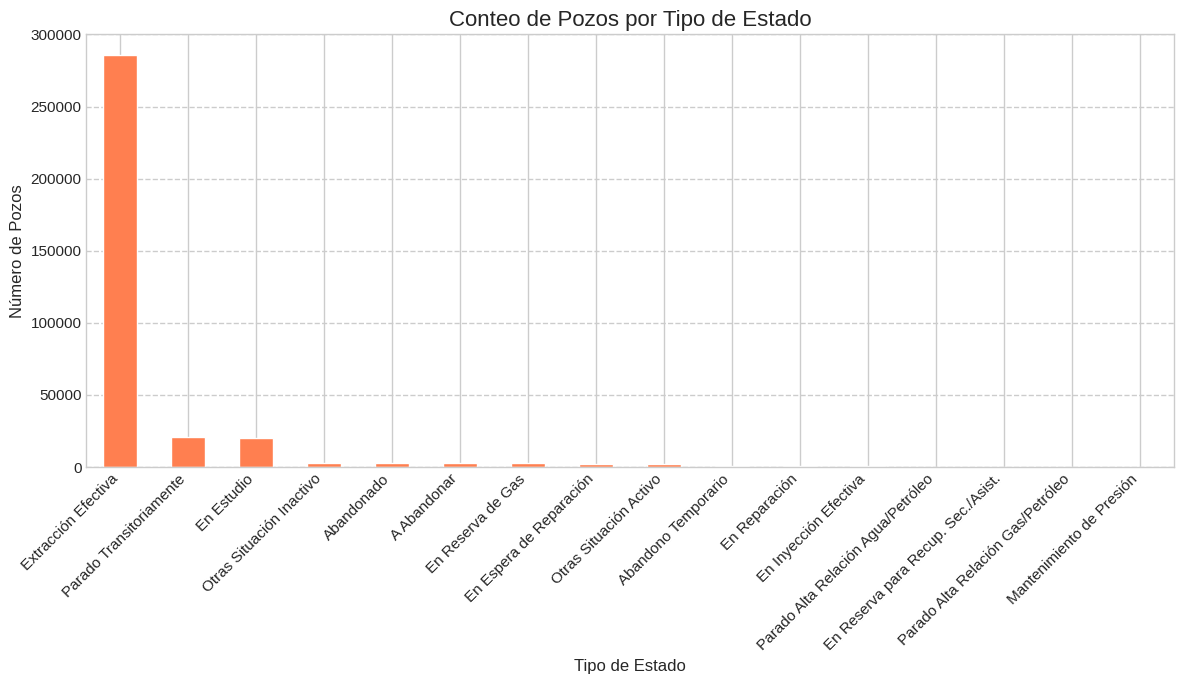

In [514]:
#An√°lisis de Datos Categ√≥ricos: Conteo de Pozos por Tipo de Estado

if 'tipoestado' not in dataset2.columns:
    print("La columna 'tipoestado' no se encuentra en dataset2.")
    exit()

# Paso 2: Contar la frecuencia de cada tipo de estado.
conteo_tipoestado = dataset2['tipoestado'].value_counts()

# Paso 3: Crear el gr√°fico de barras.
plt.figure(figsize=(12, 7))
conteo_tipoestado.plot(kind='bar', color='coral')

# Paso 4: A√±adir t√≠tulo y etiquetas.
plt.title('Conteo de Pozos por Tipo de Estado', fontsize=16)
plt.xlabel('Tipo de Estado', fontsize=12)
plt.ylabel('N√∫mero de Pozos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Paso 5: Ajustar el layout para evitar que las etiquetas se superpongan.
plt.tight_layout()

# Paso 6: Mostrar el gr√°fico.
plt.show()

El gr√°fico de distribuci√≥n del tipo de estado de los pozos revela que la mayor proporci√≥n de pozos se encuentra actualmente en estado de "Extracci√≥n Efectiva", lo que indica que son los pozos con actividad productiva predominante dentro del dataset.

**DECISI√ìN:**Para nuestro an√°lisis, con el objetivo de construir un modelo de predicci√≥n futura de la producci√≥n, las categor√≠as m√°s relevantes son aquellas que representan pozos con actividad presente. Estas corresponden principalmente a "Extracci√≥n Efectiva" y "Otras Situaci√≥n Activo", ya que reflejan pozos que est√°n operativos o en alguna otra condici√≥n de actividad. Por esta raz√≥n, se ha decidido enfocar el an√°lisis y el modelado predictivo en estas dos categor√≠as, descartando aquellos pozos que se encuentran en estados inactivos o finalizados, ya que su comportamiento pasado no ser√≠a indicativo de la producci√≥n futura de los pozos activos.

In [515]:
#Valores Nulos- Sub_tipo_recurso
columna_sub_tipo_recurso = 'sub_tipo_recurso'

# Obtener todos los valores √∫nicos de la columna 'sub_tipo_recurso'
valores_unicos = dataset2[columna_sub_tipo_recurso].unique()

# Imprimir los valores √∫nicos
print(f"Valores √∫nicos en la columna '{columna_sub_tipo_recurso}':")
for valor in valores_unicos:
    print(valor)

Valores √∫nicos en la columna 'sub_tipo_recurso':
SHALE
TIGHT
nan


In [516]:
# Definir los criterios de filtrado y el valor de imputaci√≥n
columna_tipoestado = 'tipoestado'
estados_a_conservar = ['Extracci√≥n Efectiva', 'Otras Situaci√≥n Activo']
columna_tipopozo = 'tipopozo'
valor_a_conservar_tipopozo = 'Gas√≠fero'
columna_sub_tipo_recurso = 'sub_tipo_recurso'
valor_a_imputar_sub_tipo = 'Sin Datos'

# 1. Filtrar por 'tipoestado' y 'tipopozo' en dataset2_10
dataset2_10 = dataset2_10[(dataset2_10[columna_tipoestado].isin(estados_a_conservar)) &
                                  (dataset2_10[columna_tipopozo] == valor_a_conservar_tipopozo)].copy()


# 2. Imputar valores NaN en la columna 'sub_tipo_recurso' en dataset2_10
dataset2_10[columna_sub_tipo_recurso] = dataset2_10[columna_sub_tipo_recurso].fillna(valor_a_imputar_sub_tipo)


# Imprimir el resultado con el formato solicitado (pero adaptado al filtrado realizado)
print("\nResultados despu√©s del filtrado e imputaci√≥n:")
print(f"Valores √∫nicos en la columna '{columna_tipopozo}':")
print(dataset2_10[columna_tipopozo].unique())
print(f"Cantidad de valores nulos en la columna '{columna_tipopozo}': {dataset2_10[columna_tipopozo].isnull().sum()}")
print("-" * 30)
print(f"Valores √∫nicos en la columna '{columna_tipoestado}':")
print(dataset2_10[columna_tipoestado].unique())
print(f"Cantidad de valores nulos en la columna '{columna_tipoestado}': {dataset2_10[columna_tipoestado].isnull().sum()}")
print("-" * 30)
print(f"Valores √∫nicos en la columna '{columna_sub_tipo_recurso}':")
print(dataset2_10[columna_sub_tipo_recurso].unique())
print(f"Cantidad de valores nulos en la columna '{columna_sub_tipo_recurso}': {dataset2_10[columna_sub_tipo_recurso].isnull().sum()}")
print("-" * 30)



Resultados despu√©s del filtrado e imputaci√≥n:
Valores √∫nicos en la columna 'tipopozo':
['Gas√≠fero']
Cantidad de valores nulos en la columna 'tipopozo': 0
------------------------------
Valores √∫nicos en la columna 'tipoestado':
['Extracci√≥n Efectiva' 'Otras Situaci√≥n Activo']
Cantidad de valores nulos en la columna 'tipoestado': 0
------------------------------
Valores √∫nicos en la columna 'sub_tipo_recurso':
['TIGHT' 'SHALE' 'Sin Datos']
Cantidad de valores nulos en la columna 'sub_tipo_recurso': 0
------------------------------


c. Sin nulos

Todas las dem√°s columnas que est√°n completas no requieren tratamiento.

In [517]:
#Columnas con datos de tipo object dataset2

#Creamos un resumen con tipo de dato y cantidad de nulos
resumen = pd.DataFrame({
    'Tipo de Dato': dataset2_10.dtypes,
    'Valores Nulos': dataset2_10.isnull().sum()
})

pd.DataFrame({
    'Tipo de Dato': dataset2_10.dtypes,
    'Valores Nulos': dataset2_10.isnull().sum(),
    'Porcentaje de Nulos (%)': (dataset2_10.isnull().mean() * 100).round(2)
})

# Filtramos solo las columnas de tipo object
resumen_object = resumen[resumen['Tipo de Dato'] == 'object']

print(resumen_object)

                       Tipo de Dato  Valores Nulos
idempresa                    object              0
tipoestado                   object              0
tipopozo                     object              0
fechaingreso                 object              0
rectificado                  object              0
habilitado                   object              0
empresa                      object              0
sigla                        object              0
formprod                     object              0
formacion                    object              0
idareapermisoconcesion       object              0
areapermisoconcesion         object              0
idareayacimiento             object              0
areayacimiento               object              0
cuenca                       object              0
provincia                    object              0
tipo_de_recurso              object              0
proyecto                     object              0
sub_tipo_recurso             ob

In [518]:
#Eliminar fecha_data y fechaingreso

columnas_a_eliminar = ['fecha_data', 'fechaingreso']

# Crear un nuevo DataFrame sin las columnas especificadas
dataset2_10 = dataset2_10.drop(columns=columnas_a_eliminar, errors='ignore')

# Imprimir solo el listado de columnas actualizado
print(dataset2_10.columns.tolist())

['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas', 'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef', 'tipoestado', 'tipopozo', 'rectificado', 'habilitado', 'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion', 'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento', 'areayacimiento', 'cuenca', 'provincia', 'coordenadax', 'coordenaday', 'tipo_de_recurso', 'proyecto', 'sub_tipo_recurso', 'indice_tiempo']


**Tratamiento de datos de tipo objeto**

In [519]:
#Columnas con tipo objeto

# Seleccionar solo las columnas de tipo 'object'
object_columns = dataset2_10.select_dtypes(include=['object']).columns.tolist()

# O, si tambi√©n quieres ver el tipo de dato y la cantidad de nulos para estas columnas:
resumen_object_10 = pd.DataFrame({
    'Tipo de Dato': dataset2_10[object_columns].dtypes,
    'Valores Nulos': dataset2_10[object_columns].isnull().sum()
})

print("\nResumen de columnas de tipo 'object' en dataset2_10:")
print(resumen_object_10)


Resumen de columnas de tipo 'object' en dataset2_10:
                       Tipo de Dato  Valores Nulos
idempresa                    object              0
tipoestado                   object              0
tipopozo                     object              0
rectificado                  object              0
habilitado                   object              0
empresa                      object              0
sigla                        object              0
formprod                     object              0
formacion                    object              0
idareapermisoconcesion       object              0
areapermisoconcesion         object              0
idareayacimiento             object              0
areayacimiento               object              0
cuenca                       object              0
provincia                    object              0
tipo_de_recurso              object              0
proyecto                     object              0
sub_tipo_recurso            

In [520]:
#Eliminar columnas que no son necesarias

columnas_a_eliminar = [
    'rectificado',
    'habilitado',
    'formprod',
    'formacion',
    'idareapermisoconcesion',
    'areapermisoconcesion',
    'idareayacimiento',
    'areayacimiento',
    'proyecto',
    'idempresa',
    'empresa',
    'sigla',
    'idusuario',
    'tipo_de_recurso',
    'prod_pet',
    'prod_agua',
    'iny_otro'
]

# Crear un nuevo DataFrame sin las columnas especificadas
dataset2_10 = dataset2_10.drop(columns=columnas_a_eliminar, errors='ignore')

# Volver a imprimir las columnas para confirmar la eliminaci√≥n (opcional)
# Seleccionar solo las columnas de tipo 'object'
object_df = dataset2_10.select_dtypes(include=['object'])

# Crear el DataFrame resumen
resumen_object_10 = pd.DataFrame({
    'Tipo de Dato': object_df.dtypes,
    'Valores Nulos': object_df.isnull().sum()
})
print(resumen_object_10)

                 Tipo de Dato  Valores Nulos
tipoestado             object              0
tipopozo               object              0
cuenca                 object              0
provincia              object              0
sub_tipo_recurso       object              0


**DECISI√ìN:** Eliminar las columnas 'rectificado','habilitado','formprod', 'formacion','idareapermisoconcesion','areapermisoconcesion', 'idareayacimiento', 'areayacimiento' 'proyecto', 'idempresa','empresa', 'sigla', 'idpozo', 'idusuario', 'tipo_de_recurso'. Esto debido a que no es relevante para el analisis de la produccion de los √∫ltimos 10 a√±os, ni para la produccci√≥n futura.

In [521]:
#Convertir features de object a category

columnas_a_convertir = [
    'tipoestado',
    'tipopozo',
    'cuenca',
    'provincia',
    'tipo_de_recurso',
    'sub_tipo_recurso'
]

for col in columnas_a_convertir:
    if col in dataset2_10.columns:
        dataset2_10[col] = dataset2_10[col].astype('category')

# Verificar los tipos de datos despu√©s de la conversi√≥n
print(dataset2_10.dtypes)

anio                         int64
mes                          int64
idpozo                       int64
prod_gas                   float64
iny_agua                   float64
iny_gas                    float64
iny_co2                    float64
tef                        float64
tipoestado                category
tipopozo                  category
profundidad                float64
cuenca                    category
provincia                 category
coordenadax                float64
coordenaday                float64
sub_tipo_recurso          category
indice_tiempo       datetime64[ns]
dtype: object


**Tratamiento de Outliers**

In [522]:
# Filtrar las filas donde 'prod_gas' es menor que 0
valores_negativos_prod_gas = dataset2_10[dataset2_10['prod_gas'] < 0]

# Mostrar todas las filas con valores negativos en 'prod_gas'
print("Filas con valores negativos en 'prod_gas':")
print(valores_negativos_prod_gas)

# Si solo quieres ver la cantidad de valores negativos
cantidad_negativos_prod_gas = len(valores_negativos_prod_gas)
print(f"\nCantidad de valores negativos en 'prod_gas': {cantidad_negativos_prod_gas}")

Filas con valores negativos en 'prod_gas':
        anio  mes  idpozo  prod_gas  iny_agua  iny_gas  iny_co2   tef  \
246904  2020    5  153228   -12.267       0.0      0.0      0.0  6.13   
246944  2020    5  153227    -7.519       0.0      0.0      0.0  6.13   

                 tipoestado  tipopozo  profundidad    cuenca provincia  \
246904  Extracci√≥n Efectiva  Gas√≠fero       3419.0  NEUQUINA   Neuqu√©n   
246944  Extracci√≥n Efectiva  Gas√≠fero       3419.0  NEUQUINA   Neuqu√©n   

        coordenadax  coordenaday sub_tipo_recurso indice_tiempo  
246904   -68.179297   -38.920979            TIGHT    2020-05-01  
246944   -68.179297   -38.920979            TIGHT    2020-05-01  

Cantidad de valores negativos en 'prod_gas': 2


In [523]:
# Identificar los √≠ndices de las filas con valores negativos en 'prod_gas'
indices_a_eliminar = dataset2_10[dataset2_10['prod_gas'] < 0].index

# Eliminar las filas utilizando los √≠ndices identificados
dataset2_10 = dataset2_10.drop(indices_a_eliminar)

# Resetear el √≠ndice del DataFrame despu√©s de la eliminaci√≥n (opcional)
dataset2_10 = dataset2_10.reset_index(drop=True)

# Verificar los valores m√≠nimos de 'prod_gas' despu√©s de la eliminaci√≥n
print(f"Valor m√≠nimo de 'prod_gas' despu√©s de eliminar negativos: {dataset2_10['prod_gas'].min()}")

Valor m√≠nimo de 'prod_gas' despu√©s de eliminar negativos: 0.0


**DECISI√ìN:** Se eliminaron los dos registros con valores negativos en 'prod_gas' debido a la alta probabilidad de ser lecturas err√≥neas. La coincidencia en el resto de las columnas (a√±o, mes, coordenadas, profundidad, etc.) sugiere que no son representativos del total, y la imputaci√≥n con cero podr√≠a interpretarse incorrectamente como una falta de producci√≥n en esas fechas.

La columna 'prod_gas' ha sido transformada logar√≠tmicamente y guardada como 'prod_gas_log'.


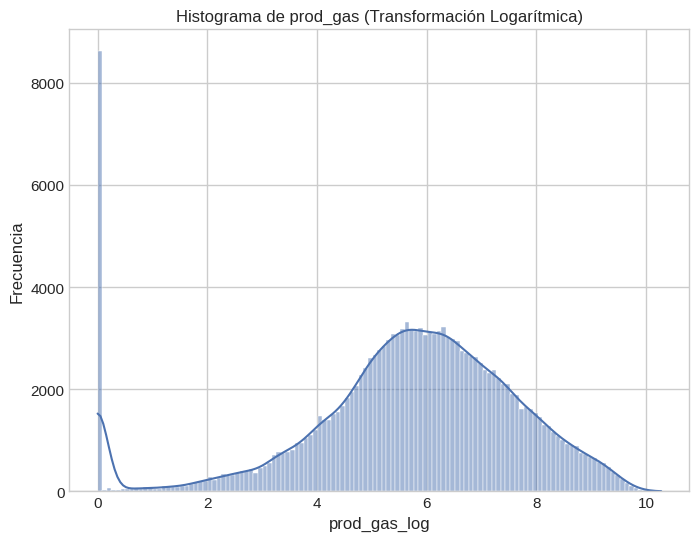

In [524]:
#Transformaci√≥n Logaritmica de Outliers en Producci√≥n de Gas

# Verificar si la columna 'prod_gas' existe
if 'prod_gas' in dataset2_10.columns:
    # Verificar si todos los valores en 'prod_gas' son no negativos
    if (dataset2_10['prod_gas'] >= 0).all():
        # Aplicar la transformaci√≥n logar√≠tmica (sumando 1 para manejar los ceros)
        dataset2_10['prod_gas_log'] = np.log1p(dataset2_10['prod_gas'])
        print("La columna 'prod_gas' ha sido transformada logar√≠tmicamente y guardada como 'prod_gas_log'.")
    else:
        print("La columna 'prod_gas' contiene valores negativos. La transformaci√≥n logar√≠tmica no se aplic√≥.")
else:
    print("La columna 'prod_gas' no se encontr√≥ en el DataFrame.")

# Para verificar la transformaci√≥n (opcional):
if 'prod_gas_log' in dataset2_10.columns:
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(8, 6))
    sns.histplot(dataset2_10['prod_gas_log'], kde=True)
    plt.title('Histograma de prod_gas (Transformaci√≥n Logar√≠tmica)')
    plt.xlabel('prod_gas_log')
    plt.ylabel('Frecuencia')
    plt.show()


--- Winsorizando 'profundidad' ---
L√≠mite inferior de 'profundidad': 5.81
L√≠mite superior de 'profundidad': 5948.00


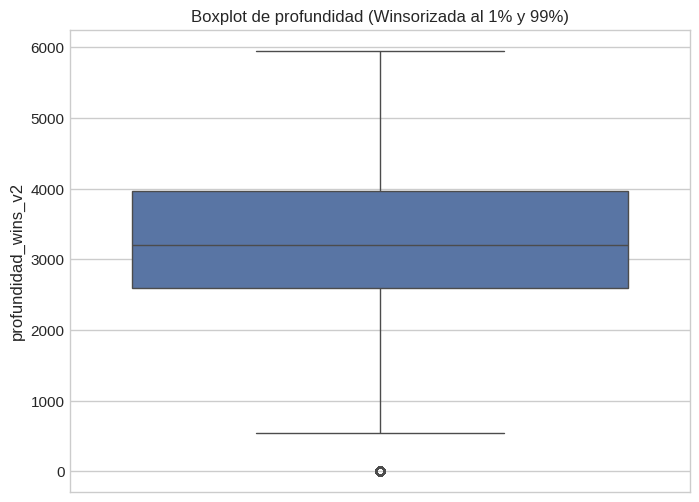

In [525]:
#Transformaci√≥n por m√©todo winzorizado de Outliers en  Profundidad

print("\n--- Winsorizando 'profundidad' ---")

# Verificar si la columna 'profundidad' existe
if 'profundidad' in dataset2_10.columns:
    # Definir los l√≠mites para 'profundidad' (puedes ajustarlos seg√∫n tu criterio)
    limite_inferior_profundidad = dataset2_10['profundidad'].quantile(0.01)
    limite_superior_profundidad = dataset2_10['profundidad'].quantile(0.99)

    # Aplicar Winsorizing a 'profundidad'
    dataset2_10['profundidad_wins_v2'] = np.where(dataset2_10['profundidad'] < limite_inferior_profundidad, limite_inferior_profundidad,
                                                 np.where(dataset2_10['profundidad'] > limite_superior_profundidad, limite_superior_profundidad,
                                                          dataset2_10['profundidad']))

    print(f"L√≠mite inferior de 'profundidad': {limite_inferior_profundidad:.2f}")
    print(f"L√≠mite superior de 'profundidad': {limite_superior_profundidad:.2f}")

    # Visualizar 'profundidad' despu√©s de Winsorizing
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=dataset2_10['profundidad_wins_v2'])
    plt.title('Boxplot de profundidad (Winsorizada al 1% y 99%)')
    plt.ylabel('profundidad_wins_v2')
    plt.show()
else:
    print("La columna 'profundidad' no se encontr√≥ en el DataFrame dataset2_10.")


In [526]:
# Z-score para outliers

import pandas as pd
from scipy import stats


variables_zscore = ['prod_gas_log', 'profundidad_wins_v2']

for variable in variables_zscore:
    if variable in dataset2_10.columns:
        # Calcular el Z-score
        dataset2_10[f'{variable}_zscore'] = np.abs(stats.zscore(dataset2_10[variable]))

        # Definir el umbral para considerar un outlier (puedes ajustarlo)
        umbral_z = 3

        # Identificar los outliers basados en el umbral
        outliers_zscore = dataset2_10[dataset2_10[f'{variable}_zscore'] > umbral_z]

        print(f"\n--- Outliers basados en Z-score (> {umbral_z}) en la columna '{variable}': ---")
        print(f"N√∫mero de outliers: {len(outliers_zscore)}")
        if not outliers_zscore.empty:
            print(outliers_zscore[[variable, f'{variable}_zscore']].head())
        else:
            print("No se encontraron outliers con este umbral.")
    else:
        print(f"La columna '{variable}' no se encuentra en el DataFrame.")


--- Outliers basados en Z-score (> 3) en la columna 'prod_gas_log': ---
N√∫mero de outliers: 0
No se encontraron outliers con este umbral.

--- Outliers basados en Z-score (> 3) en la columna 'profundidad_wins_v2': ---
N√∫mero de outliers: 0
No se encontraron outliers con este umbral.


Outliers positivos

Nuestra estrategia general se basa en:

- Transformar variables con muchos outliers y sesgo pronunciado para mejorar la distribuci√≥n para el modelado.
- Acotar outliers menos numerosos o extremos para reducir su influencia manteniendo la mayor√≠a de los datos.
- Investigar y eliminar outliers individuales extremos solo si hay una buena raz√≥n para creer que son errores.

Buscamos equilibrar la necesidad de manejar valores at√≠picos que puedan perjudicar el modelado con la importancia de preservar la informaci√≥n valiosa contenida en los datos.

**Encoding de Variables**

Dentro de nuestro dataset tenemos las siguientes categor√≠as:


- 'tipoestado'
['Extracci√≥n Efectiva' 'Otras Situaci√≥n Activo']

- 'sub_tipo_recurso'
['TIGHT' 'SHALE' 'Sin Datos']

- 'cuenca'
['NEUQUINA', 'AUSTRAL', 'GOLFO SAN JORGE']

- 'provincia'
['Neuqu√©n', 'Rio Negro', 'Santa Cruz', 'Mendoza', 'Chubut']

In [527]:
pip install category_encoders

**DECISI√ìN:** La variable 'tipoestado' se codific√≥ de forma binaria para minimizar la creaci√≥n de nuevas columnas, dada su naturaleza con un n√∫mero limitado de categor√≠as, se le asigna manualmente un valor. En contraste, las variables 'cuenca', 'provincia' y 'sub_tipo_recurso' se codificaron con One-Hot Encoding para evitar la introducci√≥n de un orden artificial entre sus categor√≠as nominales y permitir que los modelos las interpreten de forma independiente, aunque esto implique una mayor dimensionalidad.

In [528]:
# 1. Codificaci√≥n manual de 'tipoestado'
dataset2_10['tipoestado_bin'] = dataset2_10['tipoestado'].apply(lambda x: 1 if x == 'Extracci√≥n Activa' else 0)

# 2. One-Hot Encoding sin drop_first
dummies = pd.get_dummies(dataset2_10[['cuenca', 'provincia', 'sub_tipo_recurso']],
                         prefix=['cuenca', 'provincia', 'sub_tipo_recurso'])

# 3. Eliminar columnas categ√≥ricas originales
dataset2_10.drop(columns=['cuenca', 'provincia', 'sub_tipo_recurso'], inplace=True)


# 4. Concatenar las columnas codificadas al dataset original
dataset2_10 = pd.concat([dataset2_10, dummies], axis=1)

# 5. Convertir booleanas a enteros para que todo sea num√©rico
dataset2_10 = dataset2_10.astype({col: 'int' for col in dataset2_10.columns if dataset2_10[col].dtype == 'bool'})

# 6. Verificaci√≥n
print(dataset2_10.dtypes)

anio                                   int64
mes                                    int64
idpozo                                 int64
prod_gas                             float64
iny_agua                             float64
iny_gas                              float64
iny_co2                              float64
tef                                  float64
tipoestado                          category
tipopozo                            category
profundidad                          float64
coordenadax                          float64
coordenaday                          float64
indice_tiempo                 datetime64[ns]
prod_gas_log                         float64
profundidad_wins_v2                  float64
prod_gas_log_zscore                  float64
profundidad_wins_v2_zscore           float64
tipoestado_bin                         int64
cuenca_AUSTRAL                         int64
cuenca_GOLFO SAN JORGE                 int64
cuenca_NEUQUINA                        int64
provincia_

**Normalizaci√≥n de variables**

In [529]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Columnas a normalizar
cols_to_standard_scale = ['prod_gas', 'profundidad']

# Inicializar el StandardScaler
standard_scaler = StandardScaler()

# Ajustar el escalador a los datos y transformar las columnas
dataset2_10[cols_to_standard_scale] = standard_scaler.fit_transform(dataset2_10[cols_to_standard_scale])

# Mostrar las primeras filas de las columnas normalizadas
print("\nPrimeras filas de las columnas normalizadas con StandardScaler:")
print(dataset2_10[cols_to_standard_scale].head())

# üîé Verificaci√≥n despu√©s del concat
print("¬øtipoestado est√° presente despu√©s del concat?", 'tipoestado' in dataset2_10.columns)
print("Columnas categ√≥ricas actuales:", dataset2_10.select_dtypes(include='category').columns.tolist())


Primeras filas de las columnas normalizadas con StandardScaler:
   prod_gas  profundidad
0 -0.234666    -0.069743
1  2.241143    -0.230741
2  0.088969     0.046040
3  2.714597    -0.221594
4 -0.516368    -0.031192
¬øtipoestado est√° presente despu√©s del concat? True
Columnas categ√≥ricas actuales: ['tipoestado', 'tipopozo']


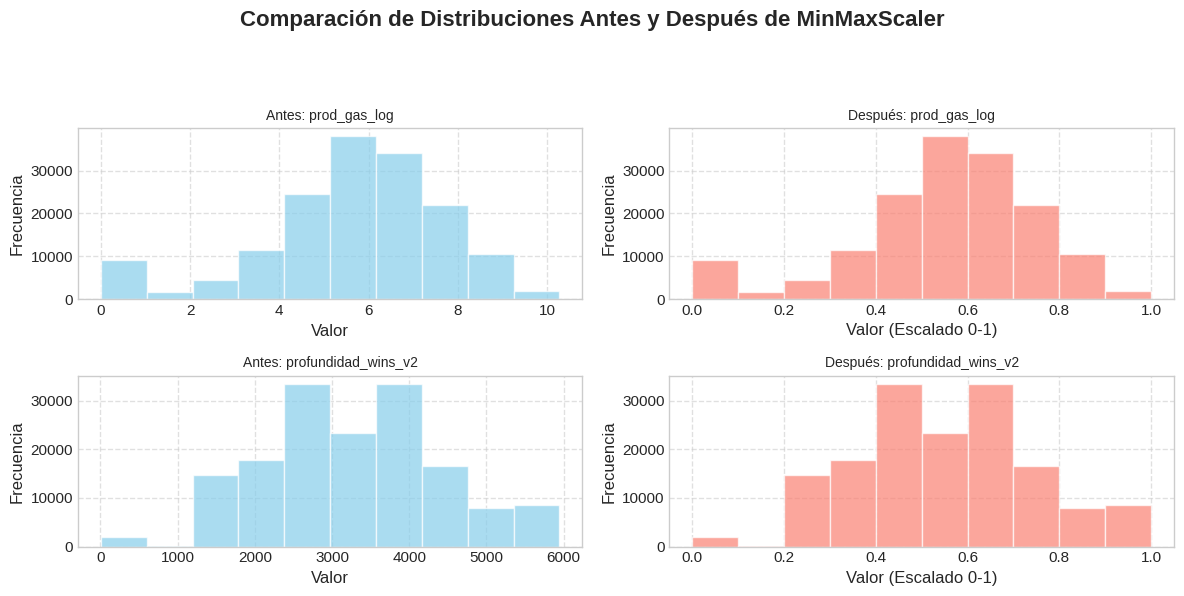

In [530]:
# Gr√°ficos comparativos antes y despues de normalizar

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Columnas a normalizar
cols_to_scale = ['prod_gas_log','profundidad_wins_v2' ]

# Crear copias de las columnas originales para la comparaci√≥n
dataset_before_scaling = dataset2_10.copy()[cols_to_scale]

# Inicializar el MinMaxScaler
minmax_scaler = MinMaxScaler()

# Ajustar el escalador a los datos y transformar las columnas
dataset2_encoded_scaled = dataset2_10.copy()
dataset2_encoded_scaled.loc[:, cols_to_scale] = minmax_scaler.fit_transform(dataset2_encoded_scaled.loc[:, cols_to_scale])

# N√∫mero de variables a graficar
num_cols = len(cols_to_scale)

# Crear la figura y los subplots (2 columnas: antes y despu√©s)
fig, axes = plt.subplots(num_cols, 2, figsize=(12, 3 * num_cols))
fig.suptitle('Comparaci√≥n de Distribuciones Antes y Despu√©s de MinMaxScaler', fontsize=16, fontweight='bold', y=1.02)

# Aplanar el array de axes para facilitar la iteraci√≥n
axes = axes.flatten()

# Iterar sobre las columnas y graficar los histogramas
for i, col in enumerate(cols_to_scale):
    # Histograma ANTES de la normalizaci√≥n (subplot izquierdo)
    axes[(i * 2)].hist(dataset_before_scaling.loc[:, col], bins=10, color='skyblue', alpha=0.7, edgecolor='white')
    axes[(i * 2)].set_title(f'Antes: {col}', fontsize=10)
    axes[(i * 2)].set_xlabel('Valor')
    axes[(i * 2)].set_ylabel('Frecuencia')
    axes[(i * 2)].grid(True, linestyle='--', alpha=0.6)

    # Histograma DESPU√âS de la normalizaci√≥n (subplot derecho)
    axes[(i * 2) + 1].hist(dataset2_encoded_scaled.loc[:, col], bins=10, color='salmon', alpha=0.7, edgecolor='white')
    axes[(i * 2) + 1].set_title(f'Despu√©s: {col}', fontsize=10)
    axes[(i * 2) + 1].set_xlabel('Valor (Escalado 0-1)')
    axes[(i * 2) + 1].set_ylabel('Frecuencia')
    axes[(i * 2) + 1].grid(True, linestyle='--', alpha=0.6)

# Ajustar el layout para evitar superposiciones
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Inspecci√≥n Dataset2_10**

Se realiza una √∫ltima inspecci√≥n previo a la exportar el dataset editado

In [531]:
#Inspecci√≥n B√°sica Dataset2_10
dataset2_10.head()

anio  mes  idpozo  prod_gas  iny_agua  iny_gas  iny_co2    tef  \
0  2014    1  145547 -0.234666       0.0      0.0      0.0  30.88   
1  2014    1  137345  2.241143       0.0      0.0      0.0  31.00   
2  2014    1  144008  0.088969       0.0      0.0      0.0  31.00   
3  2014    1  144470  2.714597       0.0      0.0      0.0  31.00   
4  2014    1  137075 -0.516368       0.0      0.0      0.0  31.00   

            tipoestado  tipopozo  ...  cuenca_GOLFO SAN JORGE  \
0  Extracci√≥n Efectiva  Gas√≠fero  ...                       0   
1  Extracci√≥n Efectiva  Gas√≠fero  ...                       0   
2  Extracci√≥n Efectiva  Gas√≠fero  ...                       0   
3  Extracci√≥n Efectiva  Gas√≠fero  ...                       0   
4  Extracci√≥n Efectiva  Gas√≠fero  ...                       0   

   cuenca_NEUQUINA  provincia_Chubut provincia_Mendoza  provincia_Neuqu√©n  \
0                1                 0                 0                  1   
1                1                 0                 0                  1   
2                1                 0                 0                  0   
3                1                 0                 0                  1   
4                1                 0                 0                  1   

   provincia_Rio Negro  provincia_Santa Cruz  sub_tipo_recurso_SHALE  \
0                    0                     0                       0   
1                    0                     0                       0   
2                    1                     0                       0   
3                    0                     0                       0   
4                    0                     0                       0   

   sub_tipo_recurso_Sin Datos  sub_tipo_recurso_TIGHT  
0                           0                       1  
1                           0                       1  
2                           0                       1  
3                           0                       1  
4                           0                       1  

[5 rows x 30 columns]

In [532]:
#Inspecci√≥n B√°sica Dataset2_10
dataset2_10.shape

(157780, 30)

In [533]:
#Inspecci√≥n B√°sica Dataset2_10
dataset2_10.columns

Index(['anio', 'mes', 'idpozo', 'prod_gas', 'iny_agua', 'iny_gas', 'iny_co2',
       'tef', 'tipoestado', 'tipopozo', 'profundidad', 'coordenadax',
       'coordenaday', 'indice_tiempo', 'prod_gas_log', 'profundidad_wins_v2',
       'prod_gas_log_zscore', 'profundidad_wins_v2_zscore', 'tipoestado_bin',
       'cuenca_AUSTRAL', 'cuenca_GOLFO SAN JORGE', 'cuenca_NEUQUINA',
       'provincia_Chubut', 'provincia_Mendoza', 'provincia_Neuqu√©n',
       'provincia_Rio Negro', 'provincia_Santa Cruz', 'sub_tipo_recurso_SHALE',
       'sub_tipo_recurso_Sin Datos', 'sub_tipo_recurso_TIGHT'],
      dtype='object')

In [534]:
#Inspecci√≥n B√°sica Dataset2_10
dataset2_10.isnull().sum()

anio                          0
mes                           0
idpozo                        0
prod_gas                      0
iny_agua                      0
iny_gas                       0
iny_co2                       0
tef                           0
tipoestado                    0
tipopozo                      0
profundidad                   0
coordenadax                   0
coordenaday                   0
indice_tiempo                 0
prod_gas_log                  0
profundidad_wins_v2           0
prod_gas_log_zscore           0
profundidad_wins_v2_zscore    0
tipoestado_bin                0
cuenca_AUSTRAL                0
cuenca_GOLFO SAN JORGE        0
cuenca_NEUQUINA               0
provincia_Chubut              0
provincia_Mendoza             0
provincia_Neuqu√©n             0
provincia_Rio Negro           0
provincia_Santa Cruz          0
sub_tipo_recurso_SHALE        0
sub_tipo_recurso_Sin Datos    0
sub_tipo_recurso_TIGHT        0
dtype: int64

In [535]:
#Inspecci√≥n B√°sica Dataset2_10
dataset2_10.dtypes

anio                                   int64
mes                                    int64
idpozo                                 int64
prod_gas                             float64
iny_agua                             float64
iny_gas                              float64
iny_co2                              float64
tef                                  float64
tipoestado                          category
tipopozo                            category
profundidad                          float64
coordenadax                          float64
coordenaday                          float64
indice_tiempo                 datetime64[ns]
prod_gas_log                         float64
profundidad_wins_v2                  float64
prod_gas_log_zscore                  float64
profundidad_wins_v2_zscore           float64
tipoestado_bin                         int64
cuenca_AUSTRAL                         int64
cuenca_GOLFO SAN JORGE                 int64
cuenca_NEUQUINA                        int64
provincia_Chubut                       int64
provincia_Mendoza                      int64
provincia_Neuqu√©n                      int64
provincia_Rio Negro                    int64
provincia_Santa Cruz                   int64
sub_tipo_recurso_SHALE                 int64
sub_tipo_recurso_Sin Datos             int64
sub_tipo_recurso_TIGHT                 int64
dtype: object

Se elimina:
* 'tipoestado' ya que nos interesa 'tipoestado_bin' que transformamos previamente.
* 'tipopozo' dado que filtramos y s√≥lo nos quedamos con la categor√≠a Gas√≠fero
* 'indice_tiempo' ya que basaremos nuestro modelo de predicci√≥n en 'anio' y/o 'mes'

In [536]:
dataset2_10.drop(columns=['tipoestado', 'tipopozo', 'indice_tiempo'], inplace=True)
print(dataset2_10.columns)

Index(['anio', 'mes', 'idpozo', 'prod_gas', 'iny_agua', 'iny_gas', 'iny_co2',
       'tef', 'profundidad', 'coordenadax', 'coordenaday', 'prod_gas_log',
       'profundidad_wins_v2', 'prod_gas_log_zscore',
       'profundidad_wins_v2_zscore', 'tipoestado_bin', 'cuenca_AUSTRAL',
       'cuenca_GOLFO SAN JORGE', 'cuenca_NEUQUINA', 'provincia_Chubut',
       'provincia_Mendoza', 'provincia_Neuqu√©n', 'provincia_Rio Negro',
       'provincia_Santa Cruz', 'sub_tipo_recurso_SHALE',
       'sub_tipo_recurso_Sin Datos', 'sub_tipo_recurso_TIGHT'],
      dtype='object')


In [537]:
dataset2_10.to_csv('dataset2_editado.csv', index=False)